In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pickle

In [4]:
%matplotlib inline

In [5]:
df_uci_cc = pd.read_csv('UCI_Credit_Card.csv')

In [30]:
# ID: ID of each client
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [273]:
df_uci_cc['PAY_0'].value_counts(dropna=False)

 0    14737
-1     5680
 2     2667
 1     1999
-2     1856
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [7]:
df_uci_cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [10]:
df_uci_cc = df_uci_cc.set_index('ID')

In [16]:
df_uci_cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(3, 8), dpi=80, facecolor='w', edgecolor='k')

<Figure size 240x640 with 0 Axes>

<Figure size 240x640 with 0 Axes>

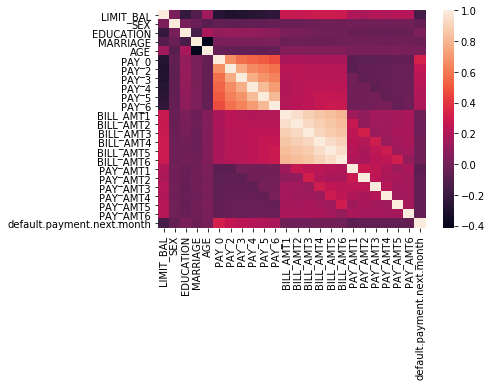

In [27]:
corr = df_uci_cc.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [29]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.00,0.02,-0.22,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.04
EDUCATION,-0.22,0.01,1.00,-0.14,0.18,0.11,0.12,0.11,0.11,0.10,0.08,0.02,0.02,0.01,-0.00,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.04,-0.04,0.03
MARRIAGE,-0.11,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.03,0.03,0.04,0.03,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.32
PAY_2,-0.30,-0.07,0.12,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.29,-0.07,0.11,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.24
PAY_4,-0.27,-0.06,0.11,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.24,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.22
PAY_5,-0.25,-0.06,0.10,0.04,-0.05,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.23,0.24,0.27,0.27,0.26,-0.01,-0.00,0.01,-0.06,-0.03,-0.02,0.20


In [68]:
drop_idx_anomaly_2 = df_uci_cc.loc[df_uci_cc['BILL_AMT1'] <= 0].index
drop_idx_anomaly_2

Int64Index([   10,    19,    20,    27,    39,    69,    74,    80,    93,
              102,
            ...
            29846, 29852, 29910, 29923, 29962, 29963, 29974, 29980, 29986,
            29999],
           dtype='int64', name='ID', length=2490)

In [60]:
# Impossible to have 0 or minus Bill Amount at September and unable to pay for loan next month
df_uci_cc.loc[(df_uci_cc['BILL_AMT1'] < 0) & (df_uci_cc['default.payment.next.month'] > 0)].shape

(109, 24)

In [69]:
df_uci_cc = df_uci_cc.drop(drop_idx_anomaly_2)

In [75]:
df_uci_cc.shape

(27402, 24)

In [64]:
# Impossible to have 0 Bill Statement, Zero Usage on all the following month, but still default
drop_idx_anomaly_1 = df_uci_cc.loc[(df_uci_cc['PAY_0'] == -2) & (df_uci_cc['PAY_2'] == -2) & (df_uci_cc['PAY_3'] == -2) & \
             (df_uci_cc['PAY_4'] == -2) & (df_uci_cc['PAY_5'] == -2) & (df_uci_cc['PAY_6'] == -2) & \
              (df_uci_cc['BILL_AMT1'] == 0) & (df_uci_cc['BILL_AMT2'] == 0) & (df_uci_cc['BILL_AMT3'] == 0) &  \
              (df_uci_cc['BILL_AMT4'] == 0) & (df_uci_cc['BILL_AMT5'] == 0) & (df_uci_cc['BILL_AMT6'] == 0) &  \
              (df_uci_cc['default.payment.next.month'] == 1)].index

In [65]:
drop_idx_anomaly_1

Int64Index([   46,   275,  2298,  2538,  2635,  3151,  5754,  6170,  6955,
             7266,
            ...
            28927, 29020, 29045, 29050, 29085, 29115, 29164, 29729, 29761,
            29909],
           dtype='int64', name='ID', length=108)

In [66]:
df_uci_cc = df_uci_cc.drop(drop_idx_anomaly_1)

In [67]:
df_uci_cc.shape

(29892, 24)

In [31]:
df_uci_cc['BILL_AMT1'].value_counts(dropna=False)

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
52515.0        1
7691.0         1
10183.0        1
144525.0       1
79900.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

In [15]:
df_uci_cc['PAY_2'].value_counts(dropna=False)

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [19]:
df_uci_cc['default.payment.next.month'].value_counts(dropna=False, normalize=True) # Do not need imbalance / re weighthing variable

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [24]:
df_test = df_uci_cc[['PAY_6', 'default.payment.next.month']].copy()

In [25]:
df_test

,PAY_6,default.payment.next.month
0,-2,1
1,2,1
2,0,0
3,0,0
4,0,0
...,...,...
29995,0,0
29996,0,0
29997,0,1
29998,-1,1


In [71]:
# del df_test

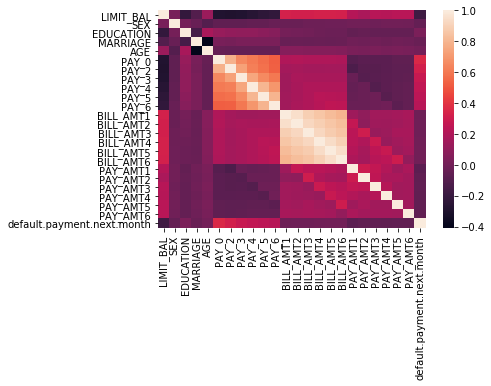

In [72]:
corr = df_uci_cc.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [319]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.00,0.02,-0.22,-0.10,0.14,-0.28,-0.29,-0.28,-0.26,-0.24,-0.22,0.33,0.32,0.32,0.33,0.33,0.33,0.22,0.19,0.23,0.22,0.23,0.23,-0.18
SEX,0.02,1.00,0.01,-0.03,-0.10,-0.06,-0.06,-0.06,-0.05,-0.05,-0.03,-0.03,-0.02,-0.02,-0.01,-0.01,-0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,-0.04
EDUCATION,-0.22,0.01,1.00,-0.15,0.18,0.12,0.11,0.10,0.10,0.09,0.07,0.01,0.01,0.00,-0.01,-0.02,-0.02,-0.05,-0.04,-0.05,-0.04,-0.05,-0.04,0.04
MARRIAGE,-0.10,-0.03,-0.15,1.00,-0.41,0.02,0.02,0.03,0.03,0.03,0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.14,-0.10,0.18,-0.41,1.00,-0.04,-0.04,-0.04,-0.04,-0.05,-0.04,0.07,0.06,0.06,0.06,0.06,0.06,0.03,0.02,0.03,0.02,0.03,0.02,0.00
PAY_0,-0.28,-0.06,0.12,0.02,-0.04,1.00,0.79,0.65,0.61,0.57,0.53,0.20,0.21,0.20,0.20,0.20,0.19,-0.09,-0.08,-0.08,-0.07,-0.06,-0.06,0.36
PAY_2,-0.29,-0.06,0.11,0.02,-0.04,0.79,1.00,0.74,0.62,0.58,0.53,0.16,0.17,0.16,0.16,0.16,0.16,-0.13,-0.09,-0.09,-0.08,-0.07,-0.07,0.32
PAY_3,-0.28,-0.06,0.10,0.03,-0.04,0.65,0.74,1.00,0.75,0.66,0.60,0.15,0.18,0.18,0.18,0.18,0.18,-0.03,-0.09,-0.08,-0.07,-0.06,-0.06,0.28
PAY_4,-0.26,-0.05,0.10,0.03,-0.04,0.61,0.62,0.75,1.00,0.81,0.70,0.15,0.18,0.20,0.20,0.20,0.20,-0.04,-0.03,-0.10,-0.07,-0.06,-0.05,0.26
PAY_5,-0.24,-0.05,0.09,0.03,-0.05,0.57,0.58,0.66,0.81,1.00,0.80,0.15,0.18,0.20,0.23,0.23,0.22,-0.04,-0.02,-0.02,-0.09,-0.06,-0.05,0.24


In [74]:
df = pd.read_csv("UCI_Credit_Card.csv", index_col=0)
# df_train.drop("y", axis=1, inplace=True)

query_str1 = "LIMIT_BAL == @LIMIT_BAL and SEX == @SEX and EDUCATION== @EDUCATION and MARRIAGE == @MARRIAGE and AGE == @AGE"
query_str2 = "PAY_0 == @PAY_2 and PAY_2 == @PAY_3 and PAY_3 == @PAY_4 and PAY_4 == @PAY_5 and PAY_5 == @PAY_6"
query_str3 = "BILL_AMT1 == @BILL_AMT2 and BILL_AMT2 == @BILL_AMT3 and BILL_AMT3 == @BILL_AMT4 and BILL_AMT4 == @BILL_AMT5 and  BILL_AMT5 == @BILL_AMT6"
query_str4 = "PAY_AMT1 == @PAY_AMT2 and PAY_AMT2 == @PAY_AMT3 and PAY_AMT3 == @PAY_AMT4 and PAY_AMT4 == @PAY_AMT5 and  PAY_AMT5 == @PAY_AMT6"

leak_id = []
leak_val = []
for ind in tqdm(df.index):
    LIMIT_BAL = df.loc[ind, "LIMIT_BAL"]
    SEX = df.loc[ind, "SEX"]
    EDUCATION = df.loc[ind, "EDUCATION"]
    MARRIAGE = df.loc[ind, "MARRIAGE"]
    AGE = df.loc[ind, "AGE"]
    PAY_0 = df.loc[ind, "PAY_0"]
    PAY_2 = df.loc[ind, "PAY_2"]
    PAY_3 = df.loc[ind, "PAY_3"]
    PAY_4 = df.loc[ind, "PAY_4"]
    PAY_5 = df.loc[ind, "PAY_5"]
    PAY_6 = df.loc[ind, "PAY_6"]
    BILL_AMT1 = df.loc[ind, "BILL_AMT1"]
    BILL_AMT2 = df.loc[ind, "BILL_AMT2"]
    BILL_AMT3 = df.loc[ind, "BILL_AMT3"]
    BILL_AMT4 = df.loc[ind, "BILL_AMT4"]
    BILL_AMT5 = df.loc[ind, "BILL_AMT5"]
    BILL_AMT6 = df.loc[ind, "BILL_AMT6"]
    PAY_AMT1 = df.loc[ind, "PAY_AMT1"]
    PAY_AMT2 = df.loc[ind, "PAY_AMT2"]
    PAY_AMT3 = df.loc[ind, "PAY_AMT3"]
    PAY_AMT4 = df.loc[ind, "PAY_AMT4"]
    PAY_AMT5 = df.loc[ind, "PAY_AMT5"]
    PAY_AMT6 = df.loc[ind, "PAY_AMT6"]

    # skip new customer
    if PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6 == -12 and BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6 == 0:
        continue
    if PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6 == -9 and BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6 == 0:
        continue

    queried1 = df.query(query_str1)
    if len(queried1) == 0:
        continue

    queried2 = queried1.query(query_str2)
    if len(queried2) == 0:
        continue

    queried3 = queried2.query(query_str3)
    if len(queried3) == 0:
        continue

    queried4 = queried3.query(query_str4)
    if len(queried4) != 1:
        continue

    if ind != queried4.index[0]:
        leak_id.append(queried4.index[0])
        leak_id.append(ind)

df.loc[leak_id, :]

/Users/ovo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
25661,240000.0,2,2,1,34,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5246,240000.0,2,2,1,34,-2,-2,-2,-2,-2,-2,6170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26634,80000.0,1,1,2,26,1,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6118,80000.0,1,1,2,26,1,1,-2,-2,-2,-2,74384.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,0.0,0
13693,50000.0,1,1,1,47,0,0,0,0,0,0,49550.0,51636.0,53561.0,53283.0,53057.0,52908.0,2743.0,2668.0,1712.0,1762.0,1894.0,1670.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,50000.0,1,2,2,45,0,0,0,0,2,0,20638.0,19834.0,19387.0,22574.0,20483.0,20121.0,1314.0,1340.0,5000.0,0.0,729.0,793.0,0
10325,220000.0,1,3,1,39,0,0,0,0,0,-1,192815.0,208365.0,88004.0,31237.0,15980.0,529.0,20000.0,5003.0,3047.0,5000.0,1000.0,81000.0,0
29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0


In [76]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [77]:
df_uci_cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [84]:
# df_uci_cc.loc[(df_uci_cc['PAY_0'] == -2) & (df_uci_cc['default.payment.next.month'] > 0)].shape
df_uci_cc.loc[(df_uci_cc['PAY_0'] == -2) & (df_uci_cc['default.payment.next.month'] > 0)].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
24,450000.0,2,1,1,40,-2,-2,-2,-2,-2,-2,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,1
66,200000.0,1,1,1,57,-2,-2,-2,-1,2,2,152519.0,148751.0,144076.0,8174.0,8198.0,7918.0,0.0,0.0,8222.0,300.0,0.0,1000.0,1
574,160000.0,2,2,2,60,-2,-1,-1,0,-1,-1,3128.0,5156.0,1089.0,489.0,3177.0,1009.0,5156.0,1089.0,0.0,3177.0,1009.0,0.0,1
656,280000.0,1,2,1,39,-2,-2,-2,-2,-2,-2,2082.0,3557.0,5623.0,5400.0,3866.0,3526.0,3597.0,5672.0,5427.0,3885.0,3543.0,3519.0,1
926,180000.0,1,1,2,27,-2,-1,2,2,-2,-2,11392.0,14688.0,14040.0,13440.0,13440.0,13080.0,3500.0,0.0,0.0,0.0,0.0,0.0,1


In [115]:
# If there is no bill in current amount, likelihood will default to the next month is 0 on this dataset
df_uci_cc.loc[(df_uci_cc['BILL_AMT1'] > 0) & (df_uci_cc['default.payment.next.month'] == 0)].shape

(21409, 24)

In [99]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [116]:
df_uci_cc.shape

(27402, 24)

In [118]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [277]:
!pwd

/Users/ovo/Documents/TechnicalTest/OCBC


### Checkpoint Data 1

In [276]:
df_bak = df_uci_cc.copy()
saveObject = df_bak

with open("df_uci_cc.bak","wb") as f:
    pickle.dump(saveObject, f)

In [278]:
with open("df_uci_cc.bak","rb") as f:

    df_uci_bak = pickle.load(f)

In [279]:
df_uci_cc.shape, df_uci_bak.shape

((27402, 24), (27402, 24))

In [119]:
# select columns that are needed
df_uci_cc_whitelist = df_uci_cc.loc[:,
                ['LIMIT_BAL',
                 'SEX',
                 'EDUCATION',
                 'MARRIAGE',
                 'AGE',
                 'default.payment.next.month']]

In [120]:
df_uci_cc_whitelist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   default.payment.next.month  27402 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.5 MB


In [121]:
df_uci_cc_whitelist.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
ID,,,,,,
1,20000.0,2,2,1,24,1
2,120000.0,2,2,2,26,1
3,90000.0,2,2,2,34,0
4,50000.0,2,2,1,37,0
5,50000.0,1,2,1,57,0


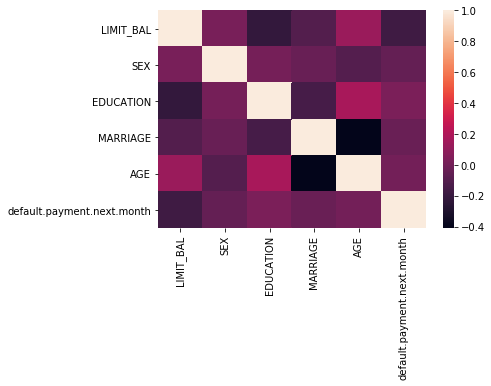

In [124]:
corr_whitelist = df_uci_cc_whitelist.corr()

# plot the heatmap
sns.heatmap(corr_whitelist, 
        xticklabels=corr_whitelist.columns,
        yticklabels=corr_whitelist.columns)

In [216]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_whitelist.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Matrix - Whitelist Criteria")\
    .set_precision(2)\

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
LIMIT_BAL,1.00,0.02,-0.22,-0.10,0.14,-0.18
SEX,0.02,1.00,0.01,-0.03,-0.10,-0.04
EDUCATION,-0.22,0.01,1.00,-0.15,0.18,0.04
MARRIAGE,-0.10,-0.03,-0.15,1.00,-0.41,-0.02
AGE,0.14,-0.10,0.18,-0.41,1.00,0.00
default.payment.next.month,-0.18,-0.04,0.04,-0.02,0.00,1.00


### Whitelist Criteria X Non Payment Data

In [239]:
df_uci_cc_whitelist["LIMIT_BAL"].describe()

count      27402.000000
mean      163473.822349
std       129870.675448
min        10000.000000
25%        50000.000000
50%       130000.000000
75%       230000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [219]:
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

### Limit Balance Distributions VS Bad Rate

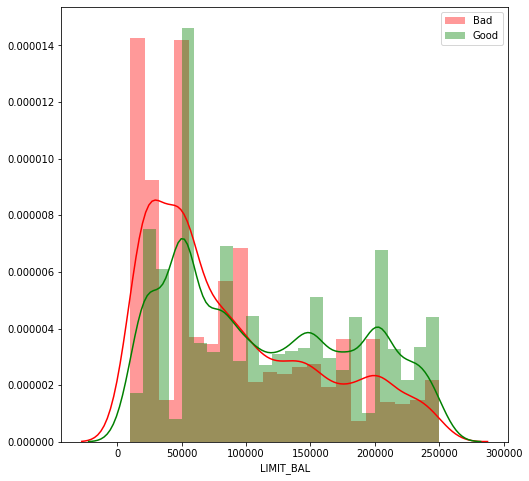

In [266]:
feature = "LIMIT_BAL"
target = "default.payment.next.month"
data = df_uci_cc_whitelist.copy()

thres = data[feature].quantile(0.8)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

In [240]:
# 0, 80000, 150000, 250000, 99999999999

### Unable to derive significant range from Age Variables

### Age Distributions VS Bad Rate

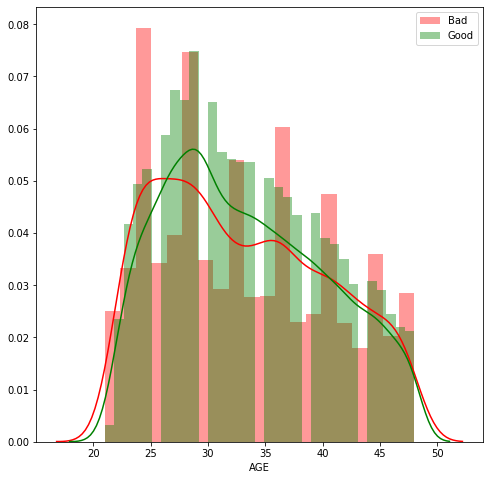

In [231]:
feature = "AGE"
target = "default.payment.next.month"
data = df_uci_cc_whitelist.copy()

thres = data[feature].quantile(0.9)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

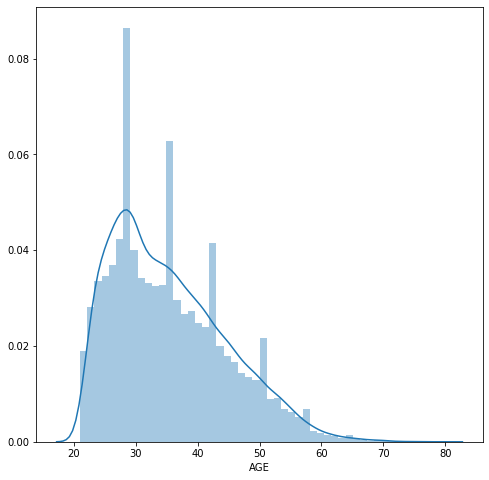

In [387]:
sns.distplot(df_uci_cc["AGE"])

In [388]:
df_uci_cc["AGE"].describe()

count    27402.000000
mean        35.398475
std          9.220631
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [389]:
### AGE : As Age correlation is 0, means that the disperse of target label based on age feature is randomly distributed
### and no significant power toward target, plus the distribution of Age is already on legal terms ( SEE:AGE Plot)
### it means that AGE is only used as Restrictive Criteria in the Application Process and should not be accomodated into modelling phase

### Unable to differ from SEX as not ethical

In [234]:
df_uci_cc_whitelist['EDUCATION'].value_counts(dropna=False)

2    13109
1     9307
3     4563
5      261
4      104
6       48
0       10
Name: EDUCATION, dtype: int64

### Education Distributions VS Bad Rate

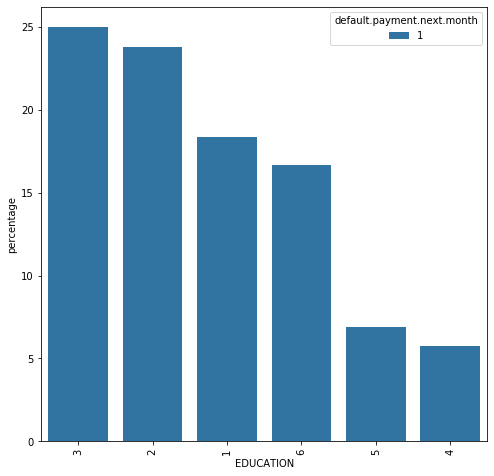

In [233]:
feature = "EDUCATION"
target = "default.payment.next.month"
data = df_uci_cc_whitelist.copy()
data[target] = df_uci_cc_whitelist[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [236]:
df_uci_cc_whitelist['MARRIAGE'].value_counts(dropna=False)

2    14642
1    12406
3      303
0       51
Name: MARRIAGE, dtype: int64

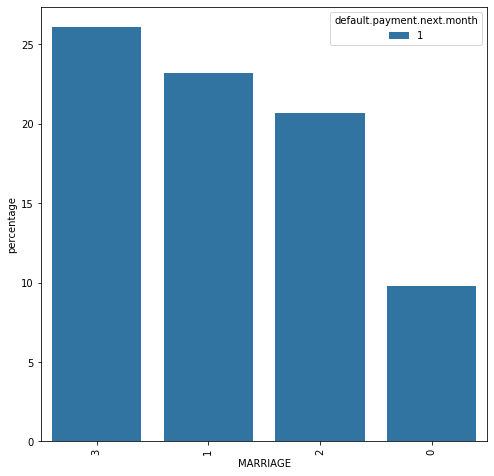

In [235]:
feature = "MARRIAGE"
target = "default.payment.next.month"
data = df_uci_cc_whitelist.copy()
data[target] = df_uci_cc_whitelist[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Categorical Feature Composition using WoE vs BadRate

In [263]:
from os.path import dirname
import os, sys
from ovo_abc_score.preprocess import *
# from ovo_abc_score.model import *
from ovo_abc_score.evaluation import *
from ovo_abc_score.credit_risk import *

In [269]:
feature = 'LIMIT_BAL'
target_var = "default.payment.next.month"
data = df_uci_cc_whitelist.copy()
thres = data[feature].quantile(0.9)
data = data.loc[data[feature]<thres,:]

woeiv = calculate_woe_numerical(data[feature], data[target_var], bins=[-1, 80000, 150000, 250000, 99999999999])
print("Information Value: {}".format(woeiv[0]))
woeiv[1]

Information Value: 0.08583112402687902


,min_val,max_val,tot_bad,tot_good,total,pct_bad,pct_good,distr_bad,distr_good,distr_margin,WoE,IV
bucket,,,,,,,,,,,,
"(-1, 80000]",10000.0,80000.0,3138,7192,10330,0.552368,0.382451,0.303775,0.696225,-0.169916,-0.367612,-0.000000
"(80000, 150000]",90000.0,150000.0,1159,4012,5171,0.204013,0.213348,0.224135,0.775865,0.009334,0.044737,0.000418
"(150000, 250000]",160000.0,250000.0,986,5019,6005,0.173561,0.266897,0.164197,0.835803,0.093336,0.430334,0.040166
"(250000, 99999999999]",260000.0,350000.0,398,2582,2980,0.070058,0.137304,0.133557,0.866443,0.067246,0.672872,0.045248


In [271]:
df_uci_cc_whitelist["EDUCATION"].value_counts(dropna=False)

2    13109
1     9307
3     4563
5      261
4      104
6       48
0       10
Name: EDUCATION, dtype: int64

In [270]:
feature = "EDUCATION"
target = "default.payment.next.month"

data = df_uci_cc_whitelist.copy()

woeiv = calculate_woe_categorical(data[feature], data[target_var])
print("Information Value: {}".format(woeiv[0]))
woeiv[1]

Information Value: 0.010889196103363315


,tot_bad,tot_good,total,pct_bad,pct_good,distr_bad,distr_good,distr_margin,WoE,IV
feature,,,,,,,,,,
0,0,10,10,0.000000,0.000467,0.000000,0.000467,-0.000467,-inf,-0.000000
1,1707,7600,9307,0.284832,0.354991,0.284832,0.354991,-0.070159,-0.220192,-0.000000
2,3115,9994,13109,0.519773,0.466813,0.519773,0.466813,0.052960,0.107464,0.005691
3,1139,3424,4563,0.190055,0.159933,0.190055,0.159933,0.030122,0.172560,0.005198
4,6,98,104,0.001001,0.004578,0.001001,0.004578,-0.003576,-1.519989,-0.000000
5,18,243,261,0.003004,0.011350,0.003004,0.011350,-0.008347,-1.329470,-0.000000
6,8,40,48,0.001335,0.001868,0.001335,0.001868,-0.000533,-0.336219,-0.000000


In [272]:
feature = "MARRIAGE"
target = "default.payment.next.month"

data = df_uci_cc_whitelist.copy()

woeiv = calculate_woe_categorical(data[feature], data[target_var])
print("Information Value: {}".format(woeiv[0]))
woeiv[1]

Information Value: 0.003336972599257643


,tot_bad,tot_good,total,pct_bad,pct_good,distr_bad,distr_good,distr_margin,WoE,IV
feature,,,,,,,,,,
0,5,46,51,0.000834,0.002149,0.000834,0.002149,-0.001314,-0.945984,-0.000000
1,2879,9527,12406,0.480394,0.445000,0.480394,0.445000,0.035394,0.076532,0.002709
2,3030,11612,14642,0.505590,0.542389,0.505590,0.542389,-0.036799,-0.070257,-0.000000
3,79,224,303,0.013182,0.010463,0.013182,0.010463,0.002719,0.231021,0.000628


### Payment Data Feature Composition Processing

In [280]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

### 1. Non Consumption Ratio ( How many times Credit Card is not being used )

In [283]:
df_uci_cc['PAY0_NotUtil'] = df_uci_cc['PAY_0'].apply(lambda x: 1 if x == -2 else 0)
df_uci_cc['PAY2_NotUtil'] = df_uci_cc['PAY_2'].apply(lambda x: 1 if x == -2 else 0)
df_uci_cc['PAY3_NotUtil'] = df_uci_cc['PAY_3'].apply(lambda x: 1 if x == -2 else 0)
df_uci_cc['PAY4_NotUtil'] = df_uci_cc['PAY_4'].apply(lambda x: 1 if x == -2 else 0)
df_uci_cc['PAY5_NotUtil'] = df_uci_cc['PAY_5'].apply(lambda x: 1 if x == -2 else 0)
df_uci_cc['PAY6_NotUtil'] = df_uci_cc['PAY_6'].apply(lambda x: 1 if x == -2 else 0)

In [284]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [285]:
df_uci_cc['NonUtilRatio'] = df_uci_cc['PAY0_NotUtil'] + df_uci_cc['PAY2_NotUtil'] + df_uci_cc['PAY3_NotUtil'] + \
                            df_uci_cc['PAY4_NotUtil'] + df_uci_cc['PAY5_NotUtil'] + df_uci_cc['PAY6_NotUtil']

In [286]:
df_uci_cc['NonUtilRatio'].value_counts(dropna=False)

0    23073
6     1414
1     1102
2      692
3      552
4      484
5       85
Name: NonUtilRatio, dtype: int64

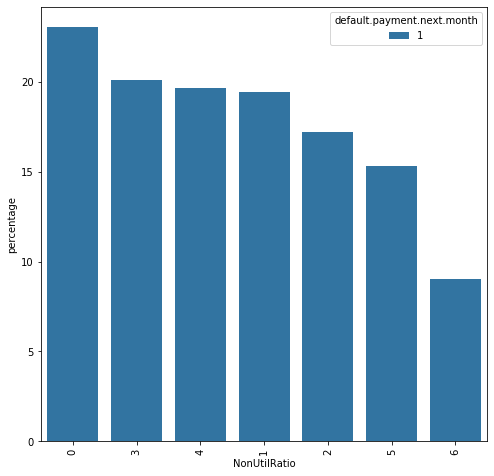

In [292]:
feature = "NonUtilRatio"
target = "default.payment.next.month"
data = df_uci_cc.copy()
data[target] = df_uci_cc[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [301]:
# No Utilization Over Time from April 2005 to September 2005 but still default in the next month.
df_zeroutilization_default = df_uci_cc.loc[(df_uci_cc['PAY_0'] == -2) & (df_uci_cc['PAY_2'] == -2) & (df_uci_cc['PAY_3'] == -2) & \
             (df_uci_cc['PAY_4'] == -2) & (df_uci_cc['PAY_5'] == -2) & (df_uci_cc['PAY_6'] == -2) & \
              (df_uci_cc['default.payment.next.month'] == 1)].copy()

In [302]:
df_zeroutilization_default.shape

(128, 31)

In [396]:
df_zeroutilization_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY0_NotUtil,PAY2_NotUtil,PAY3_NotUtil,PAY4_NotUtil,PAY5_NotUtil,PAY6_NotUtil,NonUtilRatio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24,450000.0,2,1,1,40,-2,-2,-2,-2,-2,-2,5512.0,19420.0,1473.0,560.0,0.0,0.0,19428.0,1473.0,560.0,0.0,0.0,1128.0,1,1,1,1,1,1,1,6
656,280000.0,1,2,1,39,-2,-2,-2,-2,-2,-2,2082.0,3557.0,5623.0,5400.0,3866.0,3526.0,3597.0,5672.0,5427.0,3885.0,3543.0,3519.0,1,1,1,1,1,1,1,6
983,500000.0,1,1,2,36,-2,-2,-2,-2,-2,-2,45106.0,81264.0,18122.0,27229.0,21462.0,27911.0,81690.0,18225.0,27365.0,21570.0,28050.0,17397.0,1,1,1,1,1,1,1,6
1005,150000.0,2,3,2,30,-2,-2,-2,-2,-2,-2,456.0,9664.0,3420.0,2527.0,0.0,0.0,9664.0,3420.0,2612.0,0.0,0.0,0.0,1,1,1,1,1,1,1,6
1556,340000.0,1,1,1,52,-2,-2,-2,-2,-2,-2,30832.0,33652.0,35192.0,30000.0,10766.0,33887.0,33670.0,35212.0,30000.0,10766.0,33905.0,30200.0,1,1,1,1,1,1,1,6
1731,150000.0,2,1,1,31,-2,-2,-2,-2,-2,-2,2977.0,1408.0,0.0,0.0,0.0,0.0,1408.0,0.0,0.0,0.0,0.0,4400.0,1,1,1,1,1,1,1,6
2332,90000.0,2,1,2,29,-2,-2,-2,-2,-2,-2,1709.0,2522.0,3426.0,3426.0,2921.0,2197.0,2522.0,3426.0,3426.0,2921.0,2197.0,3087.0,1,1,1,1,1,1,1,6
2484,80000.0,2,2,1,23,-2,-2,-2,-2,-2,-2,780.0,0.0,390.0,390.0,390.0,540.0,0.0,390.0,390.0,390.0,540.0,390.0,1,1,1,1,1,1,1,6
2561,310000.0,2,1,2,32,-2,-2,-2,-2,-2,-2,20138.0,8267.0,65993.0,8543.0,1695.0,750.0,8267.0,66008.0,8543.0,1695.0,750.0,7350.0,1,1,1,1,1,1,1,6


In [316]:
df_zeroutilization_default['BILL_AMT1'].describe()

### Those who still not used Credit Card for those 6 (six) months / Zero Utilization is still default because
### of the bill amount from long way before this timeframe, as indicated based on data that they still have outstanding amount
### over time until September 2005

count       128.000000
mean      11945.945312
std       46926.399814
min          73.000000
25%         537.750000
50%        1896.500000
75%        6045.000000
max      478030.000000
Name: BILL_AMT1, dtype: float64

In [317]:
df_uci_cc['NonUtilRatio_PCT'] = (df_uci_cc['NonUtilRatio'] / 6)

In [320]:
corr_fe_1 = df_uci_cc.corr()

In [321]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_fe_1.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2


### 2. Willingness To Pay Feature

In [324]:
df_uci_cc['PAY_0'].value_counts(dropna=False, normalize=True)

 0    0.537807
-1    0.207284
 2    0.097329
 1    0.072951
-2    0.067732
 3    0.011751
 4    0.002774
 5    0.000949
 8    0.000693
 6    0.000401
 7    0.000328
Name: PAY_0, dtype: float64

In [325]:
df_uci_cc['PAY_2'].value_counts(dropna=False, normalize=True)

 0    0.574046
-1    0.198927
 2    0.143311
-2    0.065105
 3    0.011860
 4    0.003613
 1    0.001022
 5    0.000912
 7    0.000730
 6    0.000438
 8    0.000036
Name: PAY_2, dtype: float64

In [326]:
df_uci_cc['PAY_3'].value_counts(dropna=False, normalize=True)

 0    0.572112
-1    0.191373
 2    0.136121
-2    0.086271
 3    0.008503
 4    0.002774
 7    0.000985
 6    0.000839
 5    0.000766
 1    0.000146
 8    0.000109
Name: PAY_3, dtype: float64

In [327]:
df_uci_cc['PAY_4'].value_counts(dropna=False, normalize=True)

 0    0.592840
-1    0.183381
 2    0.112437
-2    0.098569
 3    0.006532
 4    0.002518
 7    0.002117
 5    0.001277
 6    0.000182
 8    0.000073
 1    0.000073
Name: PAY_4, dtype: float64

In [328]:
df_uci_cc['PAY_5'].value_counts(dropna=False, normalize=True)

 0    0.606927
-1    0.179075
-2    0.107693
 2    0.093971
 3    0.006386
 4    0.003029
 7    0.002117
 5    0.000620
 6    0.000146
 8    0.000036
Name: PAY_5, dtype: float64

In [329]:
df_uci_cc['PAY_6'].value_counts(dropna=False, normalize=True)

 0    0.582731
-1    0.185278
-2    0.121560
 2    0.099117
 3    0.006605
 4    0.001788
 7    0.001679
 6    0.000693
 5    0.000474
 8    0.000073
Name: PAY_6, dtype: float64

In [335]:
df_willing_to_pay = df_uci_cc.loc[((df_uci_cc['PAY_0'] == -1) | (df_uci_cc['PAY_0'] == 0)) & \
             ((df_uci_cc['PAY_2'] == -1) | (df_uci_cc['PAY_2'] == 0)) & \
             ((df_uci_cc['PAY_3'] == -1) | (df_uci_cc['PAY_3'] == 0)) & \
             ((df_uci_cc['PAY_4'] == -1) | (df_uci_cc['PAY_4'] == 0)) & \
             ((df_uci_cc['PAY_5'] == -1) | (df_uci_cc['PAY_5'] == 0)) & \
             ((df_uci_cc['PAY_6'] == -1) | (df_uci_cc['PAY_6'] == 0))].copy()

In [357]:
df_willing_to_pay.shape, df_uci_cc.shape

((15293, 32), (27402, 32))

In [358]:
(15293/27402) * 100

55.80979490548135

In [359]:
# From 55.80% of population that willing to pay, shown that 88.85% from them are not going to be default for the upcoming month

In [341]:
df_willing_to_pay["PAY_6"].value_counts(dropna=False)

 0    11640
-1     3653
Name: PAY_6, dtype: int64

In [343]:
df_willing_to_pay["default.payment.next.month"].value_counts(dropna=False)

0    13589
1     1704
Name: default.payment.next.month, dtype: int64

In [355]:
df_willing_to_pay["default.payment.next.month"].value_counts(dropna=False, normalize=True)

0    0.888576
1    0.111424
Name: default.payment.next.month, dtype: float64

In [346]:
df_uci_cc["default.payment.next.month"].value_counts(dropna=False, normalize=True)

0    0.781293
1    0.218707
Name: default.payment.next.month, dtype: float64

In [347]:
78.1293 + 21.8707

100.0

In [349]:
78.12 +  21.88

100.0

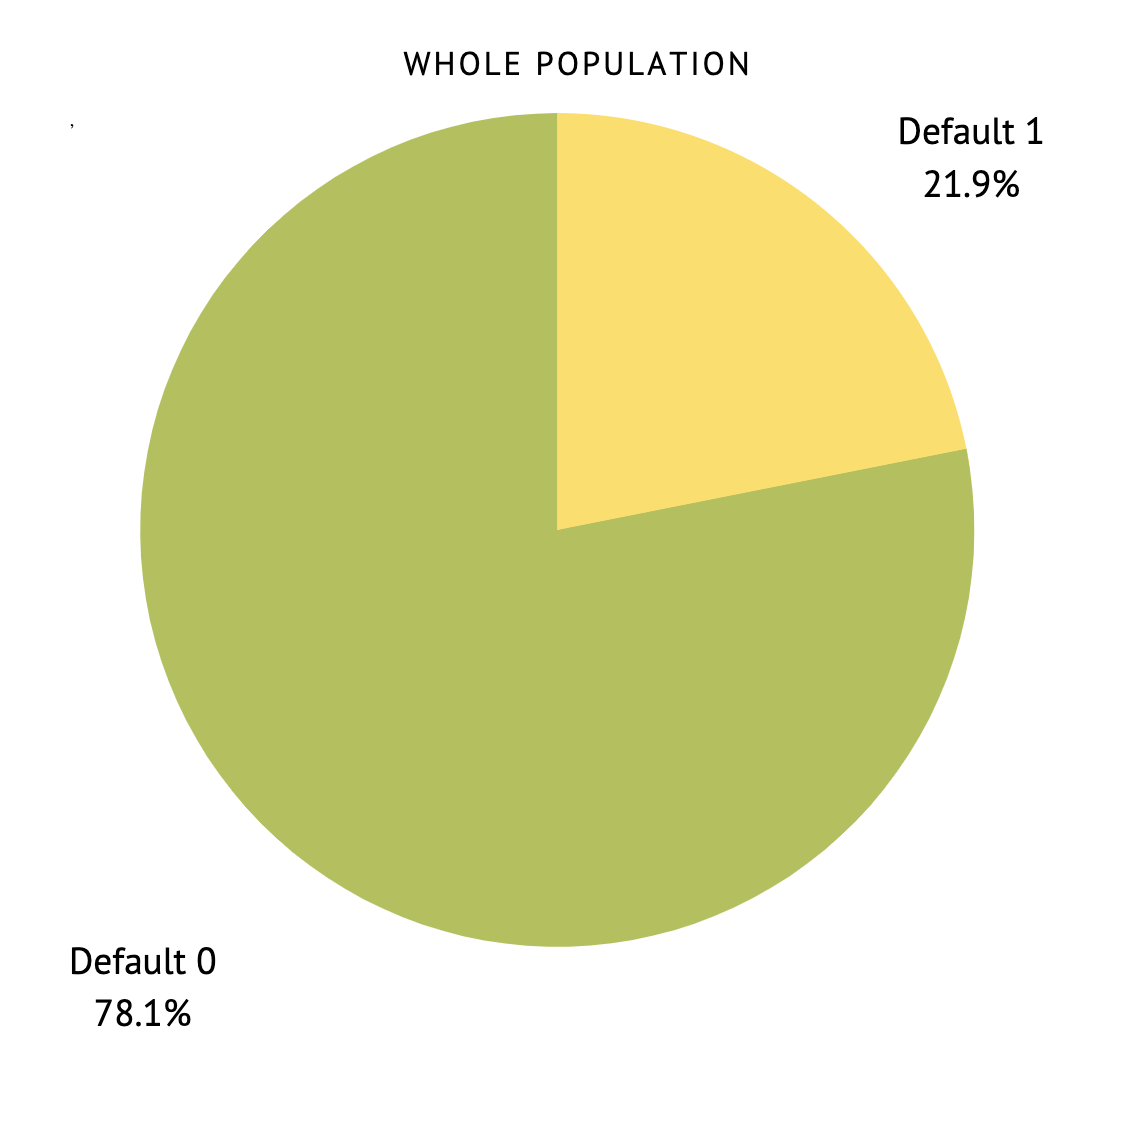

In [354]:
from IPython.display import Image
Image("viz/Population_BadComposition.png")

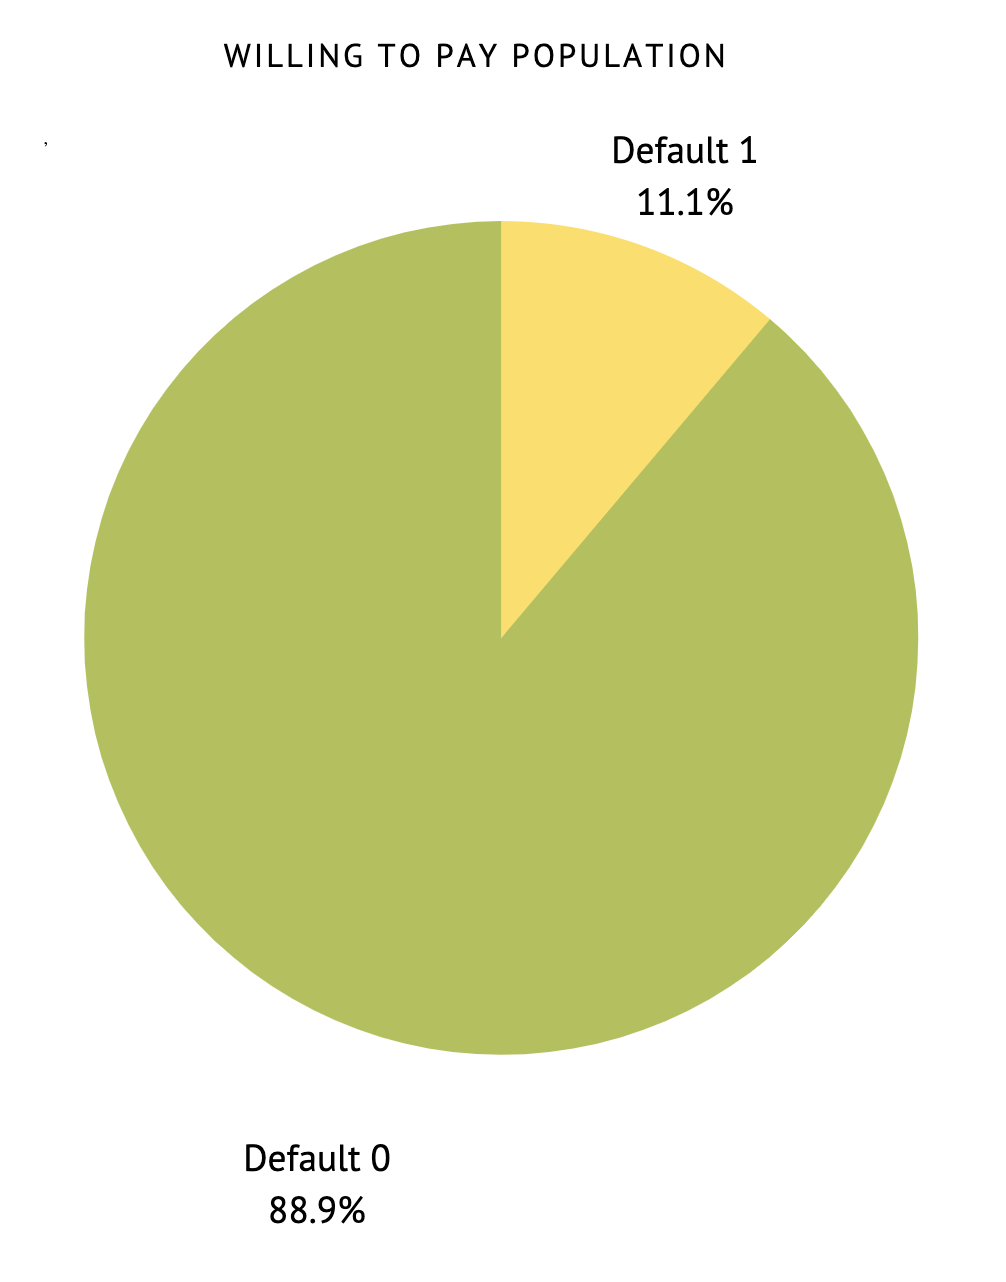

In [356]:
Image("viz/Population_WTP.png")

In [360]:
df_willing_to_pay_duly = df_uci_cc.loc[(df_uci_cc['PAY_0'] == -1) & \
             (df_uci_cc['PAY_2'] == -1) & \
             (df_uci_cc['PAY_3'] == -1) & \
             (df_uci_cc['PAY_4'] == -1) & \
             (df_uci_cc['PAY_5'] == -1) & \
             (df_uci_cc['PAY_6'] == -1)].copy()

In [383]:
df_willing_to_pay_duly["PAY_2"].value_counts(dropna=False)

-1    1991
Name: PAY_2, dtype: int64

In [361]:
df_willing_to_pay_duly.shape, df_uci_cc.shape

((1991, 32), (27402, 32))

In [362]:
df_willing_to_pay_duly["default.payment.next.month"].value_counts(dropna=False)

0    1707
1     284
Name: default.payment.next.month, dtype: int64

In [363]:
df_willing_to_pay_duly["default.payment.next.month"].value_counts(dropna=False, normalize=True)

0    0.857358
1    0.142642
Name: default.payment.next.month, dtype: float64

In [364]:
df_willing_to_pay_minimum = df_uci_cc.loc[(df_uci_cc['PAY_0'] == 0) & \
             (df_uci_cc['PAY_2'] == 0) & \
             (df_uci_cc['PAY_3'] == 0) & \
             (df_uci_cc['PAY_4'] == 0) & \
             (df_uci_cc['PAY_5'] == 0) & \
             (df_uci_cc['PAY_6'] == 0)].copy()

In [379]:
df_willing_to_pay_minimum["PAY_5"].value_counts(dropna=False)

0    9821
Name: PAY_5, dtype: int64

In [365]:
df_willing_to_pay_minimum.shape, df_uci_cc.shape

((9821, 32), (27402, 32))

In [366]:
df_willing_to_pay_minimum["default.payment.next.month"].value_counts(dropna=False)

0    8795
1    1026
Name: default.payment.next.month, dtype: int64

In [368]:
df_willing_to_pay_minimum["default.payment.next.month"].value_counts(dropna=False, normalize=True)

0    0.89553
1    0.10447
Name: default.payment.next.month, dtype: float64

In [384]:
# 2 WTP Feature, WTP Duly and WTP Duly + Minimum

In [390]:
df_uci_cc["PAY_0"].value_counts(dropna=False, normalize=True)

 0    0.537807
-1    0.207284
 2    0.097329
 1    0.072951
-2    0.067732
 3    0.011751
 4    0.002774
 5    0.000949
 8    0.000693
 6    0.000401
 7    0.000328
Name: PAY_0, dtype: float64

In [391]:
df_uci_cc["PAY_2"].value_counts(dropna=False, normalize=True)

 0    0.574046
-1    0.198927
 2    0.143311
-2    0.065105
 3    0.011860
 4    0.003613
 1    0.001022
 5    0.000912
 7    0.000730
 6    0.000438
 8    0.000036
Name: PAY_2, dtype: float64

In [392]:
df_uci_cc["PAY_3"].value_counts(dropna=False, normalize=True)

 0    0.572112
-1    0.191373
 2    0.136121
-2    0.086271
 3    0.008503
 4    0.002774
 7    0.000985
 6    0.000839
 5    0.000766
 1    0.000146
 8    0.000109
Name: PAY_3, dtype: float64

In [393]:
df_uci_cc["PAY_4"].value_counts(dropna=False, normalize=True)

 0    0.592840
-1    0.183381
 2    0.112437
-2    0.098569
 3    0.006532
 4    0.002518
 7    0.002117
 5    0.001277
 6    0.000182
 8    0.000073
 1    0.000073
Name: PAY_4, dtype: float64

In [394]:
df_uci_cc["PAY_5"].value_counts(dropna=False, normalize=True)

 0    0.606927
-1    0.179075
-2    0.107693
 2    0.093971
 3    0.006386
 4    0.003029
 7    0.002117
 5    0.000620
 6    0.000146
 8    0.000036
Name: PAY_5, dtype: float64

In [397]:
df_uci_cc["PAY_6"].value_counts(dropna=False, normalize=True)

 0    0.582731
-1    0.185278
-2    0.121560
 2    0.099117
 3    0.006605
 4    0.001788
 7    0.001679
 6    0.000693
 5    0.000474
 8    0.000073
Name: PAY_6, dtype: float64

In [405]:
df_uci_cc['PAY0_WTP'] = df_uci_cc['PAY_0'].apply(lambda x: 1 if x == -1 or x == 0 else 0)
df_uci_cc['PAY2_WTP'] = df_uci_cc['PAY_2'].apply(lambda x: 1 if x == -1 or x == 0 else 0)
df_uci_cc['PAY3_WTP'] = df_uci_cc['PAY_3'].apply(lambda x: 1 if x == -1 or x == 0 else 0)
df_uci_cc['PAY4_WTP'] = df_uci_cc['PAY_4'].apply(lambda x: 1 if x == -1 or x == 0 else 0)
df_uci_cc['PAY5_WTP'] = df_uci_cc['PAY_5'].apply(lambda x: 1 if x == -1 or x == 0 else 0)
df_uci_cc['PAY6_WTP'] = df_uci_cc['PAY_6'].apply(lambda x: 1 if x == -1 or x == 0 else 0)

In [400]:
df_uci_cc['PAY_0'].value_counts(dropna=False, normalize=True)

 0    0.537807
-1    0.207284
 2    0.097329
 1    0.072951
-2    0.067732
 3    0.011751
 4    0.002774
 5    0.000949
 8    0.000693
 6    0.000401
 7    0.000328
Name: PAY_0, dtype: float64

In [408]:
0.537807+0.207284

0.7450910000000001

In [409]:
df_uci_cc['PAY0_WTP'].value_counts(dropna=False, normalize=True)

1    0.745092
0    0.254908
Name: PAY0_WTP, dtype: float64

In [406]:
df_uci_cc['PAY_2'].value_counts(dropna=False, normalize=True)

 0    0.574046
-1    0.198927
 2    0.143311
-2    0.065105
 3    0.011860
 4    0.003613
 1    0.001022
 5    0.000912
 7    0.000730
 6    0.000438
 8    0.000036
Name: PAY_2, dtype: float64

In [407]:
0.574046+0.198927

0.7729729999999999

In [410]:
df_uci_cc['PAY2_WTP'].value_counts(dropna=False, normalize=True)

1    0.772973
0    0.227027
Name: PAY2_WTP, dtype: float64

In [412]:
df_uci_cc['Willness_Pay_Generic'] = df_uci_cc['PAY0_WTP'] + df_uci_cc['PAY2_WTP'] + df_uci_cc['PAY3_WTP'] + \
                                    df_uci_cc['PAY4_WTP'] + df_uci_cc['PAY5_WTP'] + df_uci_cc['PAY6_WTP']

In [413]:
df_uci_cc['Willness_Pay_Generic'].value_counts(dropna=False)

6    15293
5     3492
0     2886
4     2252
3     1600
2     1467
1      412
Name: Willness_Pay_Generic, dtype: int64

In [414]:
df_uci_cc['Willness_Pay_Generic'].value_counts(dropna=False, normalize=True)

6    0.558098
5    0.127436
0    0.105321
4    0.082184
3    0.058390
2    0.053536
1    0.015035
Name: Willness_Pay_Generic, dtype: float64

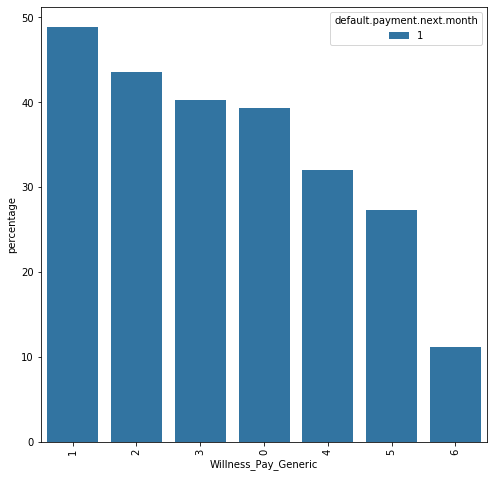

In [415]:
feature = "Willness_Pay_Generic"
target = "default.payment.next.month"
data = df_uci_cc.copy()
data[target] = df_uci_cc[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [416]:
corr_fe_2 = df_uci_cc.corr()

In [417]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_fe_2.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\

In [427]:
df_uci_cc["PAY_0"].value_counts(dropna=False, normalize=True)

 0    0.537807
-1    0.207284
 2    0.097329
 1    0.072951
-2    0.067732
 3    0.011751
 4    0.002774
 5    0.000949
 8    0.000693
 6    0.000401
 7    0.000328
Name: PAY_0, dtype: float64

In [428]:
df_uci_cc['PAY0_WTP_Duly'].value_counts(dropna=False, normalize=True)

0    0.792716
1    0.207284
Name: PAY0_WTP_Duly, dtype: float64

In [429]:
df_uci_cc['PAY0_WTP_Duly'] = df_uci_cc['PAY_0'].apply(lambda x: 1 if x == -1 else 0)
df_uci_cc['PAY2_WTP_Duly'] = df_uci_cc['PAY_2'].apply(lambda x: 1 if x == -1 else 0)
df_uci_cc['PAY3_WTP_Duly'] = df_uci_cc['PAY_3'].apply(lambda x: 1 if x == -1 else 0)
df_uci_cc['PAY4_WTP_Duly'] = df_uci_cc['PAY_4'].apply(lambda x: 1 if x == -1 else 0)
df_uci_cc['PAY5_WTP_Duly'] = df_uci_cc['PAY_5'].apply(lambda x: 1 if x == -1 else 0)
df_uci_cc['PAY6_WTP_Duly'] = df_uci_cc['PAY_6'].apply(lambda x: 1 if x == -1 else 0)

In [431]:
df_uci_cc["Willness_Pay_Duly"] = df_uci_cc['PAY0_WTP_Duly'] + df_uci_cc['PAY2_WTP_Duly'] + df_uci_cc['PAY3_WTP_Duly'] + \
                                 df_uci_cc['PAY4_WTP_Duly'] + df_uci_cc['PAY5_WTP_Duly'] + df_uci_cc['PAY6_WTP_Duly']

In [435]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

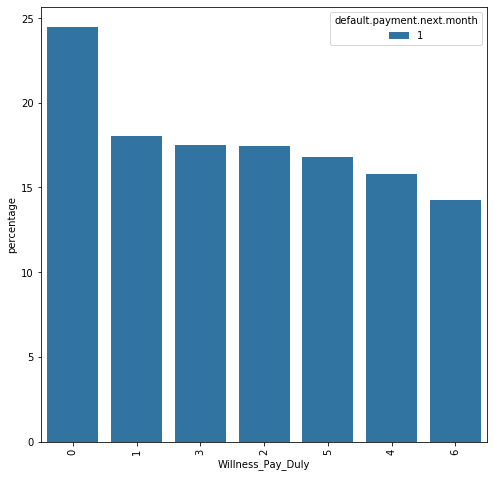

In [432]:
feature = "Willness_Pay_Duly"
target = "default.payment.next.month"
data = df_uci_cc.copy()
data[target] = df_uci_cc[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [436]:
corr_fe_3 = df_uci_cc.corr()

In [437]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_fe_3.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\

In [438]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

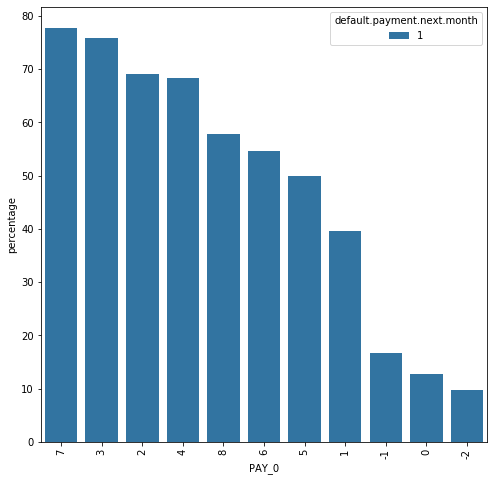

In [439]:
feature = "PAY_0"
target = "default.payment.next.month"
data = df_uci_cc.copy()
data[target] = df_uci_cc[target]
df_cnt = (data.groupby([feature])[target]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('percentage')
         )
df_cnt = df_cnt.loc[df_cnt[target]==1,:]
df_cnt = df_cnt.sort_values(by="percentage", ascending=False).reset_index(drop=True)
ax = sns.barplot(x=feature, y="percentage", hue=target, data=df_cnt, order=df_cnt[feature])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

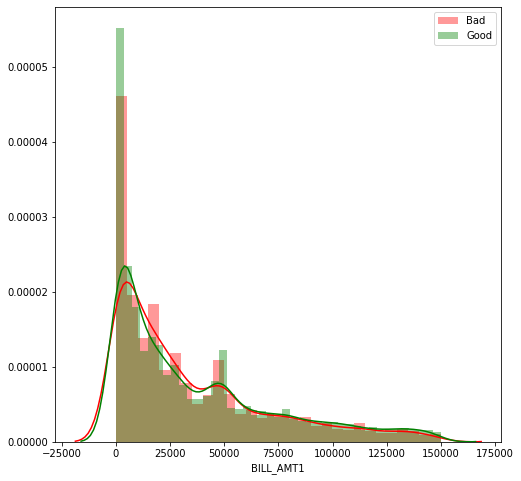

In [443]:
feature = "BILL_AMT1"
target = "default.payment.next.month"
data = df_uci_cc.copy()

thres = data[feature].quantile(0.9)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

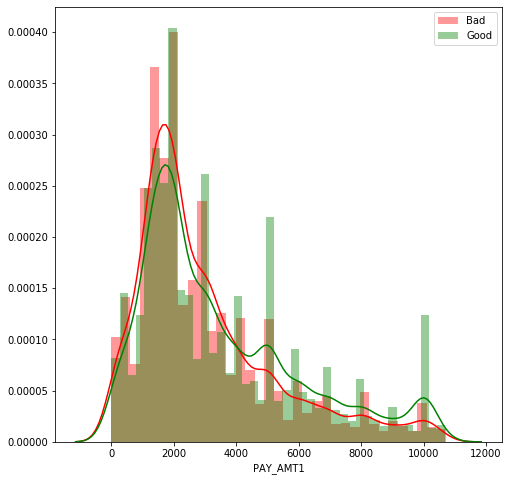

In [444]:
feature = "PAY_AMT1"
target = "default.payment.next.month"
data = df_uci_cc.copy()

thres = data[feature].quantile(0.9)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

In [447]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

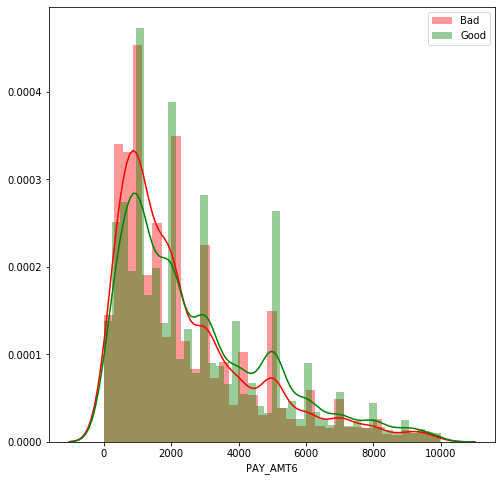

In [452]:
feature = "PAY_AMT6"
target = "default.payment.next.month"
data = df_uci_cc.copy()

thres = data[feature].quantile(0.9)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

### Bill Amount Feature Engineering

In [455]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [460]:
# df_uci_cc = df_uci_cc.drop(['bill_amount'], axis=1)

In [461]:
df_uci_cc['billamt_median'] = df_uci_cc.apply(lambda row: np.median([
    row['BILL_AMT1'], 
    row['BILL_AMT2'],
    row['BILL_AMT3'],
    row['BILL_AMT4'],
    row['BILL_AMT5'],
    row['BILL_AMT6'],
]), axis=1)

In [464]:
#create list type series of gmv
billamt_list = []

for index, row in df_uci_cc.iterrows():
    amt_list = [
        row['BILL_AMT1'], 
        row['BILL_AMT2'],
        row['BILL_AMT3'],
        row['BILL_AMT4'],
        row['BILL_AMT5'],
        row['BILL_AMT6'],
    ]
    
    billamt_list.append(amt_list)
    
df_uci_cc['bill_history'] = billamt_list

In [465]:
df_uci_cc['bill_history']

ID
1                   [3913.0, 3102.0, 689.0, 0.0, 0.0, 0.0]
2         [2682.0, 1725.0, 2682.0, 3272.0, 3455.0, 3261.0]
3        [29239.0, 14027.0, 13559.0, 14331.0, 14948.0, ...
4        [46990.0, 48233.0, 49291.0, 28314.0, 28959.0, ...
5        [8617.0, 5670.0, 35835.0, 20940.0, 19146.0, 19...
                               ...                        
29995    [72557.0, 77708.0, 79384.0, 77519.0, 82607.0, ...
29996    [188948.0, 192815.0, 208365.0, 88004.0, 31237....
29997        [1683.0, 1828.0, 3502.0, 8979.0, 5190.0, 0.0]
29998    [3565.0, 3356.0, 2758.0, 20878.0, 20582.0, 193...
30000    [47929.0, 48905.0, 49764.0, 36535.0, 32428.0, ...
Name: bill_history, Length: 27402, dtype: object

In [466]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.utils.validation import check_is_fitted
# from feature_engine.base_transformers import BaseNumericalTransformer, _define_variables
from sklearn import preprocessing
from scipy import stats
from pandas.api.types import is_numeric_dtype

In [478]:
def get_ols_trend(y, sigma=0.1, months=6, norm=False):
    """ train ordinary least squares for cashflow to know the slope and intercept """
    x = np.array(range(months, 0, -1))
    if(norm):
        y = np.array(y[:months]) / max(y)
    else:
        y = np.array(y) / 1000000
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    # number of months that the revenue are lower than the linear limit
    lower_limit = (intercept - sigma) + (slope * x)
    down_rate = np.sum(lower_limit > y)
    # number of months that the revenue are higher than the linear limit
    upper_limit = (intercept + sigma) + (slope * x)
    up_rate = np.sum(upper_limit < y)
    stable_rate = months - (up_rate + down_rate)
    results = pd.Series({'slope': slope, 'intercept': intercept, 'r_squared': r_squared, 
        'down_rate':down_rate, 'up_rate': up_rate, 'stable_rate':stable_rate})
    return results

In [479]:
def add_zero_transaction(dataframe):
    dataframe['zero_billamt'] = dataframe['bill_history'].apply(lambda x: x.count(0))
    return dataframe

def add_trends_transaction(dataframe):
    transaction_linreg = dataframe['bill_history'].apply(get_ols_trend, norm=True ,sigma=0.1)
    dataframe['bill_slope']     = transaction_linreg['slope']
    dataframe['bill_rsquared']  = transaction_linreg['r_squared']
    dataframe['bill_down_rate']  = transaction_linreg['down_rate']
    dataframe['bill_stable_rate']    = transaction_linreg['stable_rate']
    return dataframe

def add_last_3m_avg_transaction(dataframe):
    dataframe['last_3m_avg_bill'] = dataframe['bill_history'].str[:3].apply(np.mean)
    return dataframe

In [477]:
df['bill_history']

ID
1                   [3913.0, 3102.0, 689.0, 0.0, 0.0, 0.0]
2         [2682.0, 1725.0, 2682.0, 3272.0, 3455.0, 3261.0]
3        [29239.0, 14027.0, 13559.0, 14331.0, 14948.0, ...
4        [46990.0, 48233.0, 49291.0, 28314.0, 28959.0, ...
5        [8617.0, 5670.0, 35835.0, 20940.0, 19146.0, 19...
                               ...                        
29995    [72557.0, 77708.0, 79384.0, 77519.0, 82607.0, ...
29996    [188948.0, 192815.0, 208365.0, 88004.0, 31237....
29997        [1683.0, 1828.0, 3502.0, 8979.0, 5190.0, 0.0]
29998    [3565.0, 3356.0, 2758.0, 20878.0, 20582.0, 193...
30000    [47929.0, 48905.0, 49764.0, 36535.0, 32428.0, ...
Name: bill_history, Length: 27402, dtype: object

In [473]:
df = df_uci_cc.copy()

In [474]:
df = df.pipe(add_zero_transaction)

In [480]:
df = df.pipe(add_trends_transaction)

In [481]:
df = df.pipe(add_last_3m_avg_transaction)

In [482]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY0_NotUtil,PAY2_NotUtil,PAY3_NotUtil,PAY4_NotUtil,PAY5_NotUtil,PAY6_NotUtil,NonUtilRatio,NonUtilRatio_PCT,PAY0_WTP,PAY2_WTP,PAY3_WTP,PAY4_WTP,PAY5_WTP,PAY6_WTP,Willness_Pay_Generic,PAY0_WTP_Duly,PAY2_WTP_Duly,PAY3_WTP_Duly,PAY4_WTP_Duly,PAY5_WTP_Duly,PAY6_WTP_Duly,Willness_Pay_Duly,billamt_median,bill_history,zero_billamt,bill_slope,bill_rsquared,bill_down_rate,bill_stable_rate,last_3m_avg_bill
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1,2,0.333333,0,0,1,1,0,0,2,0,0,1,1,0,0,2,344.5,"[3913.0, 3102.0, 689.0, 0.0, 0.0, 0.0]",3,0.215837,0.804470,2.0,1.0,2568.000000
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,0,0,0,0,0.000000,1,0,1,1,1,0,4,1,0,0,0,0,0,1,2971.5,"[2682.0, 1725.0, 2682.0, 3272.0, 3455.0, 3261.0]",0,-0.071739,0.528291,1.0,4.0,2363.000000
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0,0,0,0,0,0.000000,1,1,1,1,1,1,6,0,0,0,0,0,0,0,14639.5,"[29239.0, 14027.0, 13559.0, 14331.0, 14948.0, ...",0,0.063433,0.327363,2.0,2.0,18941.666667
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0,0,0,0,0,0.000000,1,1,1,1,1,1,6,0,0,0,0,0,0,0,38268.5,"[46990.0, 48233.0, 49291.0, 28314.0, 28959.0, ...",0,0.096230,0.705370,1.0,4.0,48171.333333
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,0,0,0,0,0.000000,1,1,1,1,1,1,6,1,0,1,0,0,0,2,19138.5,"[8617.0, 5670.0, 35835.0, 20940.0, 19146.0, 19...",0,-0.062272,0.153128,3.0,2.0,16707.333333


In [483]:
df_uci_cc = df.copy()

In [484]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [485]:
df_bak_2 = df_uci_cc.copy()
saveObject2 = df_bak_2

with open("df_uci_cc_2.bak","wb") as f:
    pickle.dump(saveObject2, f)

In [486]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [489]:
df_uci_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   SEX                         27402 non-null  int64  
 2   EDUCATION                   27402 non-null  int64  
 3   MARRIAGE                    27402 non-null  int64  
 4   AGE                         27402 non-null  int64  
 5   PAY_0                       27402 non-null  int64  
 6   PAY_2                       27402 non-null  int64  
 7   PAY_3                       27402 non-null  int64  
 8   PAY_4                       27402 non-null  int64  
 9   PAY_5                       27402 non-null  int64  
 10  PAY_6                       27402 non-null  int64  
 11  BILL_AMT1                   27402 non-null  float64
 12  BILL_AMT2                   27402 non-null  float64
 13  BILL_AMT3                   274

In [499]:
# select columns that are needed
model_feat_creditscore_v1 = df_uci_cc.loc[:,
                ['LIMIT_BAL',
                 'EDUCATION',
                 'MARRIAGE',
                 'PAY_0',
                 'BILL_AMT1',
                 'NonUtilRatio_PCT',
                 'Willness_Pay_Generic',
                 'Willness_Pay_Duly',
                 'billamt_median',
                 'zero_billamt',
                 'bill_slope',
                 'bill_rsquared',
                 'bill_down_rate',
                 'bill_stable_rate',
                 'last_3m_avg_bill',
                 'default.payment.next.month']]

In [500]:
model_feat_creditscore_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   EDUCATION                   27402 non-null  int64  
 2   MARRIAGE                    27402 non-null  int64  
 3   PAY_0                       27402 non-null  int64  
 4   BILL_AMT1                   27402 non-null  float64
 5   NonUtilRatio_PCT            27402 non-null  float64
 6   Willness_Pay_Generic        27402 non-null  int64  
 7   Willness_Pay_Duly           27402 non-null  int64  
 8   billamt_median              27402 non-null  float64
 9   zero_billamt                27402 non-null  int64  
 10  bill_slope                  27402 non-null  float64
 11  bill_rsquared               27402 non-null  float64
 12  bill_down_rate              27402 non-null  float64
 13  bill_stable_rate            274

In [501]:
model_feat_creditscore_v1.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,BILL_AMT1,NonUtilRatio_PCT,Willness_Pay_Generic,Willness_Pay_Duly,billamt_median,zero_billamt,bill_slope,bill_rsquared,bill_down_rate,bill_stable_rate,last_3m_avg_bill,default.payment.next.month
ID,,,,,,,,,,,,,,,,
1,20000.0,2,1,2,3913.0,0.333333,2,2,344.5,3,0.215837,0.804470,2.0,1.0,2568.000000,1
2,120000.0,2,2,-1,2682.0,0.000000,4,1,2971.5,0,-0.071739,0.528291,1.0,4.0,2363.000000,1
3,90000.0,2,2,0,29239.0,0.000000,6,0,14639.5,0,0.063433,0.327363,2.0,2.0,18941.666667,0
4,50000.0,2,1,0,46990.0,0.000000,6,0,38268.5,0,0.096230,0.705370,1.0,4.0,48171.333333,0
5,50000.0,2,1,-1,8617.0,0.000000,6,2,19138.5,0,-0.062272,0.153128,3.0,2.0,16707.333333,0


In [502]:
def get_woe_feat_marriage(x):
    y = 0
    if x == 0 :
        y = -0.945984
    elif x == 1 :
        y = 0.076532
    elif x == 2 :
        y = -0.070257
    elif x == 3 :
        y = 0.231021
    else:
        y = 0.076532
    return y

model_feat_creditscore_v1['marriage_woe'] = model_feat_creditscore_v1['MARRIAGE'].map(lambda x: get_woe_feat_marriage(x))

In [503]:
model_feat_creditscore_v1['marriage_woe'].value_counts(dropna=False)

-0.070257    14642
 0.076532    12406
 0.231021      303
-0.945984       51
Name: marriage_woe, dtype: int64

In [504]:
def get_woe_feat_education(x):
    y = 0
    if x == 1 :
        y = -0.220192
    elif x == 2 :
        y = 0.107464
    elif x == 3 :
        y = 0.172560
    elif x == 4 :
        y = -1.519989
    elif x == 5 :
        y = -1.329470
    elif x == 6 :
        y = -0.336219
    else:
        y = 0.172560
    return y

model_feat_creditscore_v1['education_woe'] = model_feat_creditscore_v1['EDUCATION'].map(lambda x: get_woe_feat_education(x))

In [505]:
model_feat_creditscore_v1['education_woe'].value_counts(dropna=False)

 0.107464    13109
-0.220192     9307
 0.172560     4573
-1.329470      261
-1.519989      104
-0.336219       48
Name: education_woe, dtype: int64

In [506]:
df_bak_3 = model_feat_creditscore_v1.copy()
saveObject3 = df_bak_3.copy()

with open("df_uci_cc_3.bak","wb") as f:
    pickle.dump(saveObject3, f)

In [507]:
model_feat_creditscore_v2 = model_feat_creditscore_v1.drop(['EDUCATION', 'MARRIAGE'], axis=1)

In [508]:
model_feat_creditscore_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   PAY_0                       27402 non-null  int64  
 2   BILL_AMT1                   27402 non-null  float64
 3   NonUtilRatio_PCT            27402 non-null  float64
 4   Willness_Pay_Generic        27402 non-null  int64  
 5   Willness_Pay_Duly           27402 non-null  int64  
 6   billamt_median              27402 non-null  float64
 7   zero_billamt                27402 non-null  int64  
 8   bill_slope                  27402 non-null  float64
 9   bill_rsquared               27402 non-null  float64
 10  bill_down_rate              27402 non-null  float64
 11  bill_stable_rate            27402 non-null  float64
 12  last_3m_avg_bill            27402 non-null  float64
 13  default.payment.next.month  274

In [509]:
model_feat_creditscore_v2.head()

,LIMIT_BAL,PAY_0,BILL_AMT1,NonUtilRatio_PCT,Willness_Pay_Generic,Willness_Pay_Duly,billamt_median,zero_billamt,bill_slope,bill_rsquared,bill_down_rate,bill_stable_rate,last_3m_avg_bill,default.payment.next.month,marriage_woe,education_woe
ID,,,,,,,,,,,,,,,,
1,20000.0,2,3913.0,0.333333,2,2,344.5,3,0.215837,0.804470,2.0,1.0,2568.000000,1,0.076532,0.107464
2,120000.0,-1,2682.0,0.000000,4,1,2971.5,0,-0.071739,0.528291,1.0,4.0,2363.000000,1,-0.070257,0.107464
3,90000.0,0,29239.0,0.000000,6,0,14639.5,0,0.063433,0.327363,2.0,2.0,18941.666667,0,-0.070257,0.107464
4,50000.0,0,46990.0,0.000000,6,0,38268.5,0,0.096230,0.705370,1.0,4.0,48171.333333,0,0.076532,0.107464
5,50000.0,-1,8617.0,0.000000,6,2,19138.5,0,-0.062272,0.153128,3.0,2.0,16707.333333,0,0.076532,0.107464


In [510]:
scaled_features = model_feat_creditscore_v2.copy()

In [514]:
col_scaled = ['LIMIT_BAL', 'BILL_AMT1', 'billamt_median', 'last_3m_avg_bill']

features = scaled_features[col_scaled]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_scaled] = features

In [594]:
scaler_bak = scaler
saveObject_scaler = scaler_bak

In [595]:
with open("scaler.bak","wb") as f:
    pickle.dump(saveObject_scaler, f)

In [596]:
with open("scaler.bak","rb") as f:

    scaler_restore = pickle.load(f)

In [597]:
scaler_restore

StandardScaler(copy=True, with_mean=True, with_std=True)

In [598]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [516]:
model_feat_creditscore_v3 = scaled_features.copy()

In [517]:
model_feat_creditscore_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27402 non-null  float64
 1   PAY_0                       27402 non-null  int64  
 2   BILL_AMT1                   27402 non-null  float64
 3   NonUtilRatio_PCT            27402 non-null  float64
 4   Willness_Pay_Generic        27402 non-null  int64  
 5   Willness_Pay_Duly           27402 non-null  int64  
 6   billamt_median              27402 non-null  float64
 7   zero_billamt                27402 non-null  int64  
 8   bill_slope                  27402 non-null  float64
 9   bill_rsquared               27402 non-null  float64
 10  bill_down_rate              27402 non-null  float64
 11  bill_stable_rate            27402 non-null  float64
 12  last_3m_avg_bill            27402 non-null  float64
 13  default.payment.next.month  274

In [518]:
model_feat_creditscore_v3.head()

,LIMIT_BAL,PAY_0,BILL_AMT1,NonUtilRatio_PCT,Willness_Pay_Generic,Willness_Pay_Duly,billamt_median,zero_billamt,bill_slope,bill_rsquared,bill_down_rate,bill_stable_rate,last_3m_avg_bill,default.payment.next.month,marriage_woe,education_woe
ID,,,,,,,,,,,,,,,,
1,-1.104764,2,-0.693793,0.333333,2,2,-0.723211,3,0.215837,0.804470,2.0,1.0,-0.717497,1,0.076532,0.107464
2,-0.334753,-1,-0.710157,0.000000,4,1,-0.683491,0,-0.071739,0.528291,1.0,4.0,-0.720379,1,-0.070257,0.107464
3,-0.565756,0,-0.357130,0.000000,6,0,-0.507074,0,0.063433,0.327363,2.0,2.0,-0.487275,0,-0.070257,0.107464
4,-0.873761,0,-0.121163,0.000000,6,0,-0.149808,0,0.096230,0.705370,1.0,4.0,-0.076292,0,0.076532,0.107464
5,-0.873761,-1,-0.631262,0.000000,6,2,-0.439050,0,-0.062272,0.153128,3.0,2.0,-0.518691,0,0.076532,0.107464


In [520]:
model_feat_creditscore_v3['NonUtilRatio_PCT'].value_counts(dropna=False)

0.000000    23073
1.000000     1414
0.166667     1102
0.333333      692
0.500000      552
0.666667      484
0.833333       85
Name: NonUtilRatio_PCT, dtype: int64

In [521]:
df_bak_4 = model_feat_creditscore_v3.copy()
saveObject4 = df_bak_4.copy()

with open("df_uci_cc_4.bak","wb") as f:
    pickle.dump(saveObject4, f)

In [522]:
target_var = "default.payment.next.month"

In [523]:
X = model_feat_creditscore_v3.copy().drop(axis=1,labels=target_var)
Y = model_feat_creditscore_v3[target_var]

In [526]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 1 to 30000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LIMIT_BAL             27402 non-null  float64
 1   PAY_0                 27402 non-null  int64  
 2   BILL_AMT1             27402 non-null  float64
 3   NonUtilRatio_PCT      27402 non-null  float64
 4   Willness_Pay_Generic  27402 non-null  int64  
 5   Willness_Pay_Duly     27402 non-null  int64  
 6   billamt_median        27402 non-null  float64
 7   zero_billamt          27402 non-null  int64  
 8   bill_slope            27402 non-null  float64
 9   bill_rsquared         27402 non-null  float64
 10  bill_down_rate        27402 non-null  float64
 11  bill_stable_rate      27402 non-null  float64
 12  last_3m_avg_bill      27402 non-null  float64
 13  marriage_woe          27402 non-null  float64
 14  education_woe         27402 non-null  float64
dtypes: float64(11), int

In [529]:
Y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29995    1
29996    0
29997    0
29998    1
30000    1
Name: default.payment.next.month, Length: 27402, dtype: int64

In [531]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [611]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

### Because this is Logistics Derivative Model, no need to scale the PD as it is already linearly PD interpretable

In [616]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1, scoring='roc_auc')

# Fit on data

best_clf = clf.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


In [613]:
# print(best_hyperparam_sgd_exp.best_estimator_.get_params())

In [623]:
print(best_clf.best_estimator_.get_params())

{'memory': None, 'steps': [('classifier', LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False))], 'verbose': False, 'classifier': LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 0.08858667904100823, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__intercept_scaling': 1, 'classifier__l1_ratio': None, 'classifier__max_iter': 100, '

In [622]:
logreg = LogisticRegression(random_state=789, penalty='l1', C=0.08858667904100823, tol=0.0001, class_weight=None, fit_intercept=True, max_iter=100, l1_ratio=None, intercept_scaling=1, solver='liblinear') 
logreg.fit(X_train, Y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=789, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [615]:
print(best_clf.best_estimator_.get_params())

{'memory': None, 'steps': [('classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))], 'verbose': False, 'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_f

In [606]:
logreg_experimental = LogisticRegression(random_state=456)

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters_exp = dict(C=C, penalty=penalty)

In [534]:
clf_sgd = SGDClassifier(random_state=678, class_weight='balanced', max_iter=50)

param_grid_sgd_classifier = {
    'loss': ['log'],
    'penalty': ['l1','l2', 'elasticnet', 'none'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.01, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.8, 0.9, 0.95, 1],
}

In [535]:
clf_sgd_grid = GridSearchCV(estimator=clf_sgd, param_grid=param_grid_sgd_classifier, n_jobs=-1, scoring='roc_auc', cv=10)

In [536]:
best_hyperparam_sgd_exp = clf_sgd_grid.fit(X_train, Y_train)

In [537]:
print(best_hyperparam_sgd_exp.best_estimator_.get_params())

{'alpha': 0.001, 'average': False, 'class_weight': 'balanced', 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.9, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 50, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'elasticnet', 'power_t': 0.5, 'random_state': 678, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [539]:
clf_sgd_best_param = SGDClassifier(random_state=345, alpha=0.001, class_weight='balanced', max_iter=10, epsilon=0.1, eta0=0.0, fit_intercept=True,
                                  l1_ratio=0.9, learning_rate='optimal', loss='log', penalty='elasticnet', power_t=0.5, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0, warm_start=False)

clf_sgd_best_param.fit(X_train, Y_train)

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.9, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=345, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [624]:
logreg.score(X_train, Y_train)

0.8170891927400127

In [625]:
logreg.score(X_test, Y_test)

0.819150488979711

In [626]:
roc=roc_auc_score(Y_train, logreg.predict_proba(X_train)[:,1])
roc

0.7697003342793898

In [627]:
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7669718198585828

In [540]:
clf_sgd_best_param.score(X_train, Y_train)

0.8054595883411999

In [541]:
clf_sgd_best_param.score(X_test, Y_test)

0.8084951102028901

In [545]:
roc=roc_auc_score(Y_train, clf_sgd_best_param.predict_proba(X_train)[:,1])
roc

0.767159204264768

In [628]:
roc=roc_auc_score(Y_test, clf_sgd_best_param.predict_proba(X_test)[:,1])
roc

0.7667735500475543

In [547]:
print('Best Penalty:', best_hyperparam_sgd_exp.best_estimator_.get_params())

Best Penalty: {'alpha': 0.001, 'average': False, 'class_weight': 'balanced', 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.9, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 50, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'elasticnet', 'power_t': 0.5, 'random_state': 678, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [588]:
clf_sgd_best_param.coef_[0]

array([-0.33832004,  0.53856753,  0.        , -0.71829497, -0.42861969,
        0.18971664,  0.1062877 ,  0.        ,  0.33435189,  0.        ,
       -0.02149393,  0.        ,  0.        ,  0.48924243,  0.18366409])

### Model Checkpoint - Stochastic Gradient Descent

In [599]:
with open("model_sgd.bak","wb") as f:
    pickle.dump(clf_sgd_best_param, f)

In [600]:
with open("model_sgd.bak","rb") as f:

    model_sgd_restore = pickle.load(f)

In [601]:
model_sgd_restore

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.9, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=345, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [602]:
clf_sgd_best_param

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.9, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=345, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [590]:
coeff = pd.DataFrame(clf_sgd_best_param.coef_[0], index = X_train.columns, columns = ['coeff'])
coeff.sort_values(by='coeff', ascending=False, inplace=True)
coeff_value = pd.concat([coeff.head(10), coeff.tail(10)], axis=0)
coeff_value.reset_index(drop=False, inplace=True)
coeff_value.rename(columns={"index":"features"}, inplace=True)

Text(0.5, 1.0, 'Coefficient Value on Logistic Model')

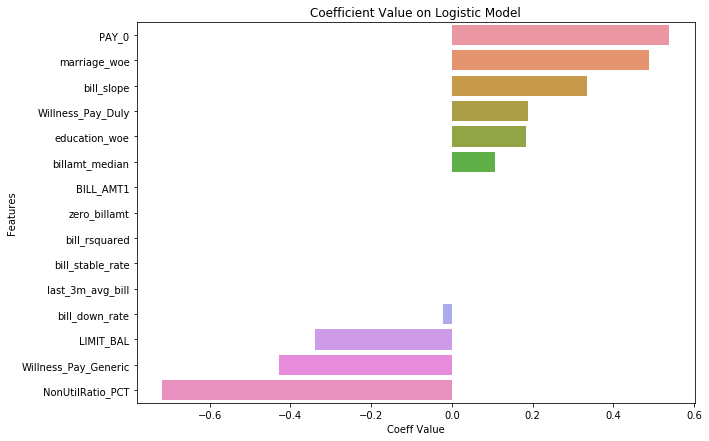

In [591]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.barplot(x="coeff", y="features", data=coeff_value)
ax.set_xlabel('Coeff Value')
ax.set_ylabel('Features')
ax.set_title('Coefficient Value on Logistic Model')

### With more careful feature selection and derivation from lending behavioral perspective, we could benchmark the same with existing Kernel iwth XGBoost with less interpretable features correlation

Text(0.5, 1.0, 'Coefficient Value on Logistic Model')

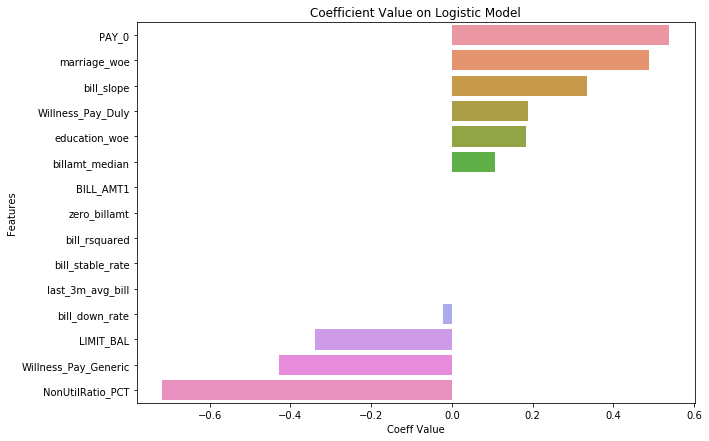

In [629]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.barplot(x="coeff", y="features", data=coeff_value)
ax.set_xlabel('Coeff Value')
ax.set_ylabel('Features')
ax.set_title('Coefficient Value on Logistic Model')

In [548]:
# Predict testing data
y_train_pred = clf_sgd_best_param.predict_proba(X_train)[:,1]
y_test_pred = clf_sgd_best_param.predict_proba(X_test)[:,1]

In [549]:
df_eval_train = pd.DataFrame({
    'default_proba':y_train_pred,
    'default_actual':Y_train,
})
df_eval_train['type'] = 'train'

df_eval_test = pd.DataFrame({
    'default_proba':y_test_pred,
    'default_actual':Y_test,
})
df_eval_test['type'] = 'test'

df_eval = pd.concat([df_eval_train,df_eval_test])

In [551]:
df_eval

,default_proba,default_actual,type
ID,,,
22286,0.903024,1,train
25035,0.511692,0,train
26960,0.156520,0,train
1873,0.339264,0,train
1170,0.260621,0,train
...,...,...,...
15895,0.201470,0,test
11907,0.350688,1,test
27864,0.778484,0,test


In [552]:
# df_out_train = pd.DataFrame({'idx':Y_train.index.values, 'actual':Y_train}).reset_index(drop=True)
# df_out_train['proba'] = y_train_pred
# df_out_train['type'] = 'train'

# df_out_test = pd.DataFrame({'idx':Y_test.index.values, 'actual':Y_test}).reset_index(drop=True)
# df_out_test['proba'] = y_test_pred
# df_out_test['type'] = 'test'

# df_out = pd.concat([df_out_train,df_out_test]).reset_index(drop=True)
# df_out.index = df_out['idx']
# df_out = df_out.drop('idx', axis=1)
# df_out_train = None; df_out_test = None

# # df_out = df_id.copy()

# df_out = pd.concat([df_id, df_out], axis=1)
# df_out = df_out.loc[df_out['type'].notnull(),:]

In [553]:
X_train

,LIMIT_BAL,PAY_0,BILL_AMT1,NonUtilRatio_PCT,Willness_Pay_Generic,Willness_Pay_Duly,billamt_median,zero_billamt,bill_slope,bill_rsquared,bill_down_rate,bill_stable_rate,last_3m_avg_bill,marriage_woe,education_woe
ID,,,,,,,,,,,,,,,
22286,-1.027763,1,-0.377522,0.000000,0,0,-0.288850,0,-0.008153,0.172910,0.0,6.0,-0.351240,0.076532,0.172560
25035,-1.104764,-1,-0.726135,0.166667,4,4,-0.722523,1,0.120270,0.428399,2.0,2.0,-0.741184,0.076532,0.107464
26960,1.436272,0,0.852003,0.000000,6,0,0.538475,0,0.093456,0.841551,1.0,4.0,0.769648,0.076532,-0.220192
1873,-0.257752,0,0.840225,0.000000,5,0,0.742955,0,0.075443,0.420910,1.0,5.0,0.835273,-0.070257,0.172560
1170,-1.027763,0,-0.726600,0.000000,6,0,-0.633339,0,-0.173602,0.999861,0.0,6.0,-0.705831,-0.070257,0.172560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16839,-1.027763,2,-0.550439,0.000000,0,0,-0.462160,0,-0.037973,0.767179,0.0,6.0,-0.524892,-0.070257,0.107464
23617,2.591288,-2,-0.655987,1.000000,0,0,-0.550641,0,-0.152664,0.686039,2.0,2.0,-0.620343,0.076532,-0.220192
19377,2.591288,-2,-0.715873,1.000000,0,0,-0.592992,0,-0.048501,0.059226,4.0,0.0,-0.616824,-0.070257,-1.519989


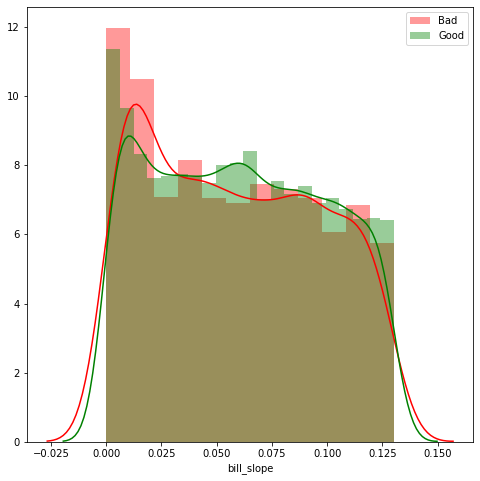

In [554]:
feature = "bill_slope"
target = "default.payment.next.month"
data = model_feat_creditscore_v3.copy()
# data[target] = df1[target]
# data[feature] = np.log1p(data[feature])
thres = data[feature].quantile(0.8)
data = data.loc[data[feature]<thres,:]
data = data.loc[data[feature]>0,:]
fig, ax = plt.subplots()
ax = sns.distplot(data.loc[data[target]==1,feature], ax=ax, color='red', label='Bad')
ax = sns.distplot(data.loc[data[target]==0,feature], ax=ax, color='green', label='Good')
ax.legend()

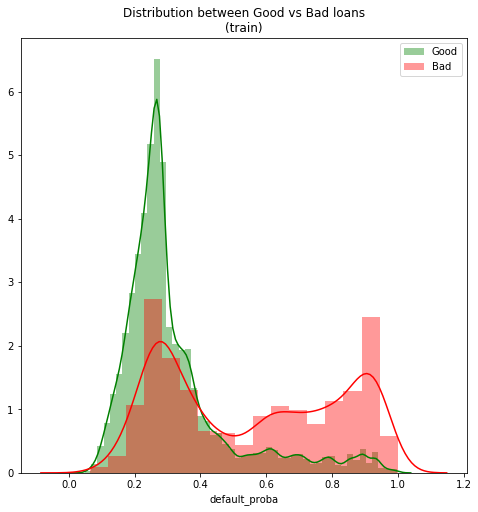

In [555]:
plot_distr(df_eval, train_or_test='train', label_actual='default_actual', label_proba='default_proba')

In [556]:
def plot_auc(ax, y_train=[], y_train_pred=[], y_test=[], y_test_pred=[]):
    
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
#         y_train_pred_labels = (y_train_pred>th).astype(int)

        fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
        roc_auc_train = auc(fpr_train, tpr_train)
#         acc_train = accuracy_score(y_train, y_train_pred_labels)
    
        ax.plot(fpr_train, tpr_train)
    
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
#         y_test_pred_labels  = (y_test_pred>th).astype(int)
        
        fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
        roc_auc_test = auc(fpr_test, tpr_test)
#         acc_test = accuracy_score(y_test, y_test_pred_labels)
        
        ax.plot(fpr_test, tpr_test)
        
    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = None
    test_text = None
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
#         train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
        train_text = 'TRAIN auc = {:.2f}'.format(roc_auc_train)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
#         test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
        test_text = 'TEST  auc = {:.2f}'.format(roc_auc_test)
    leg = []
    if ((len(y_train)>0)&(len(y_train_pred)>0)):
        leg.append(train_text)
    if ((len(y_test)>0)&(len(y_test_pred)>0)):
        leg.append(test_text)
    ax.legend(leg)

In [ ]:
df.loc[df['column_name'] == some_value]

In [561]:
df_eval_train = df_eval[df_eval['type'] == "train"].copy()

In [563]:
df_eval_test = df_eval[df_eval['type'] == "test"].copy()

In [562]:
df_eval_train["type"].value_counts(dropna=False)

train    20551
Name: type, dtype: int64

In [564]:
df_eval_test["type"].value_counts(dropna=False)

test    6851
Name: type, dtype: int64

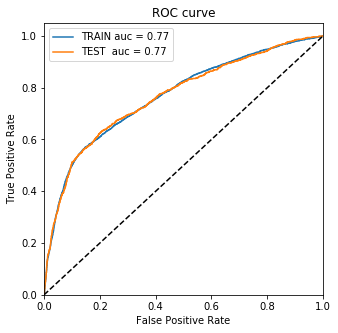

In [565]:
# Model evaluation: AUC / Gini
fig,ax = plt.subplots(1)
fig.set_size_inches(5,5)

# plot_auc(ax[1], y_test=data.default_actual, y_test_pred=data.default_proba, th=threshold)
# plot_auc(ax[1], y_train=data.default_actual, y_train_pred=data.default_proba, th=threshold)
plot_auc(ax, 
         y_train=df_eval_train.default_actual, 
         y_train_pred=df_eval_train.default_proba, 
         y_test=df_eval_test.default_actual, 
         y_test_pred=df_eval_test.default_proba
        )

In [566]:
def plot_ks(y_pred, y_true, N=10, bins=[], isplot=True):
    result = pd.DataFrame({
        "predicted":y_pred,
        "bad":y_true.astype(int),
        "good":np.abs(1-y_true).astype(int)
    })
    result = result.sort_values(by='predicted', ascending=False)
    if len(bins)>1:
        result['bucket'] = pd.cut(y_pred, bins=bins)
    else:
      # result['bucket'] = pd.qcut(result.predicted, q=N, labels=np.arange(N)+1)
        result['bucket'] = pd.qcut(result.predicted, q=N, labels=False, duplicates='drop')
        result['bucket'] = result['bucket'] + 1
    
    grouped = result.groupby('bucket',as_index=False)
    
    agg = pd.DataFrame({
        "min_scr":grouped.min().predicted, 
        "max_scr":grouped.max().predicted,
        "tot_bad": grouped.sum().bad,
        "tot_good":grouped.count().good - grouped.sum().bad,
        "total":grouped.count().bad
    })

    # agg = agg.sort_index(by='min_scr').reset_index(drop=True)
    agg = agg[['min_scr']+[x for x in agg.columns.values if x!='min_scr']]

    agg['pct_bad'] = (agg.tot_bad / result.bad.sum())#.apply('{0:.2%}'.format)
    agg['pct_good'] = (agg.tot_good / result.good.sum())#.apply('{0:.2%}'.format)
    agg['odds'] = (agg.tot_good / agg.tot_bad).apply('{0:.2f}'.format)

    agg['cum_bad'] = agg.pct_bad.cumsum()
    agg['cum_good'] = agg.pct_good.cumsum()
    agg['ks'] = np.abs(np.round(agg.cum_bad - agg.cum_good, 4))
    # agg['pct_bad']  = (agg.tot_bad / agg.total).apply('{0:.2%}'.format)
    # agg['ks'] = np.abs(np.round(((agg.tot_bad / result.bad.sum()).cumsum() - (agg.tot_good / result.good.sum()).cumsum()), 4))
    agg['max_ks'] = agg.ks.apply(lambda x: '<----' if x == agg.ks.max() else '')
    
    if isplot:
    
        fig,ax = plt.subplots(1,1)
        fig.set_size_inches(15,5)
        ax.plot(agg.index.values, agg.cum_bad, color='red', label='Bad')
        ax.plot(agg.index.values, agg.cum_good, color='green', label='Good')
        plt.xticks(np.arange(0, N, N/10))
        _ = ax.set_xlabel('{} Buckets ordered by PD (Low-to-High)'.format(N))
        _ = ax.set_ylabel('Cumulative Bad/Good Rate (%)'.format(N))
        ax.legend()

        ks_max_idx = agg.ks.argmax()
        ks_max_good = agg.cum_good[ks_max_idx]
        ks_max_bad = agg.cum_bad[ks_max_idx]
        plt.annotate(s=''.format(agg.ks.max()), xy=(ks_max_idx,ks_max_good), xytext=(ks_max_idx,ks_max_bad), arrowprops=dict(arrowstyle='<->'))
        plt.text(ks_max_idx, ks_max_good, "KS={}".format(agg.ks.max()))
    
    return agg

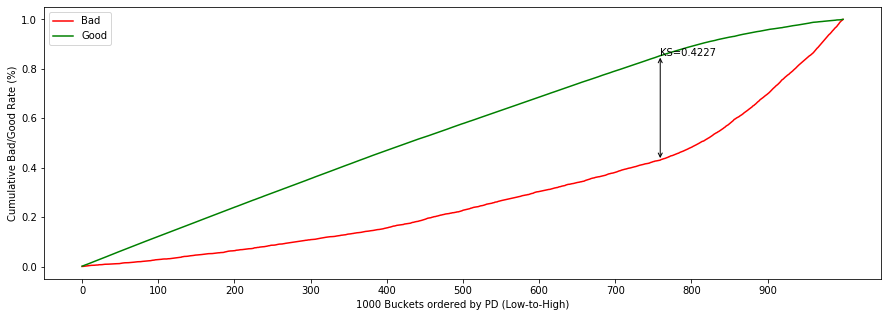

In [567]:
result_ks = plot_ks(df_eval_train.default_proba, df_eval_train.default_actual, N=1000)

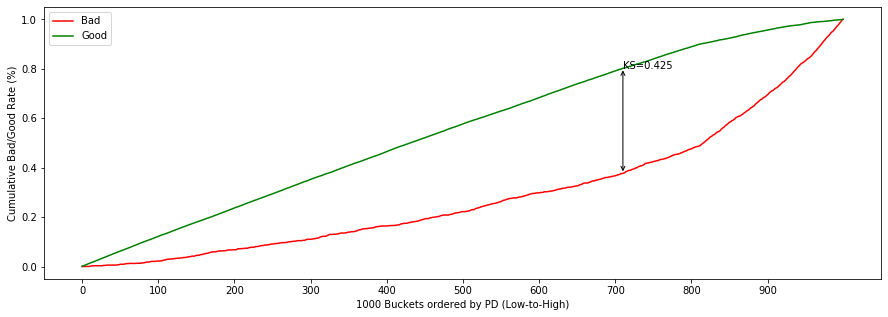

In [568]:
result_ks = plot_ks(df_eval_test.default_proba, df_eval_test.default_actual, N=1000)

In [579]:
def update_pd_grade(x,tbl_pd, label_proba='proba'):
    score = x[label_proba]
    col_thres_low = 'thres_low'
    col_thres_upp = 'thres_upp'
    
    grade = None
    for c in tbl_pd.index.values:
        if ((score>tbl_pd.loc[c,col_thres_low])&(score<tbl_pd.loc[c,col_thres_upp])):
            grade = c
            break
    return grade

In [571]:
def get_risk_rank_table(y_pred, y_true, N=10, bins=[], outstanding_amount=[]):

    os_amt = np.zeros(len(y_pred)) if len(outstanding_amount)==0 else np.double(outstanding_amount)
    result = pd.DataFrame({
        "predicted":y_pred,
        "osamount":os_amt,
        "bad":y_true.astype(int),
        "good":np.abs(1-y_true).astype(int),
        "badamount":y_true.astype(int) * os_amt,
        "goodamount":np.abs(1-y_true).astype(int) * os_amt
    })
    result = result.sort_values(by='predicted', ascending=False)
    if len(bins)>1:
        result['bucket'] = pd.cut(result['predicted'], bins=bins)
    else:
      # result['bucket'] = pd.qcut(result.predicted, q=N, labels=np.arange(N)+1)
        result['bucket'] = pd.qcut(result.predicted, q=N, labels=False, duplicates='drop')
        result['bucket'] = result['bucket'] + 1

    grouped = result.groupby(['bucket'],as_index=False)    

    agg = pd.DataFrame({
    "Proba_MIN":grouped.min().predicted, 
    "Proba_MAX":grouped.max().predicted,
    "Total_Bad": grouped.sum().bad,
    "Total_Good":grouped.sum().good,
    "Total_Population":grouped.count().bad,
    "Total_Bad_Amount":grouped.sum().badamount,
    "Total_Good_Amount":grouped.sum().goodamount,
    "Total_Population_Amount":grouped.sum().osamount,
    })

    # agg = agg.sort_index(by='min_scr').reset_index(drop=True)
    agg = agg[['Proba_MIN']+[x for x in agg.columns.values if x!='Proba_MIN']]

    agg['Rate_Bad'] = (agg.Total_Bad / agg.Total_Population)
    agg['Rate_Good'] = (agg.Total_Good / agg.Total_Population)

    agg['Cum_Rate_Bad'] = agg.Total_Bad.cumsum() / agg.Total_Population.cumsum()
    agg['Cum_Rate_Good'] = agg.Total_Good.cumsum() / agg.Total_Population.cumsum()
    agg['Cum_Rate_Population'] = (agg.Total_Population / agg.Total_Population.sum())
    
    agg['Rate_Bad_Amount'] = (agg.Total_Bad_Amount / agg.Total_Population_Amount)
    agg['Rate_Good_Amount'] = (agg.Total_Good_Amount / agg.Total_Population_Amount)

    agg['Cum_Rate_Bad_Amount'] = agg.Total_Bad_Amount.cumsum() / agg.Total_Population_Amount.cumsum()
    agg['Cum_Rate_Good_Amount'] = agg.Total_Good_Amount.cumsum() / agg.Total_Population_Amount.cumsum()
    agg['Cum_Rate_Population_Amount'] = (agg.Total_Population_Amount / agg.Total_Population_Amount.sum())
    
    if len(outstanding_amount)>0:
        agg = agg.loc[:,[
            'Proba_MIN','Proba_MAX',
            'Total_Population','Total_Bad',
            'Cum_Rate_Population','Rate_Bad','Cum_Rate_Bad',
            'Total_Population_Amount','Total_Bad_Amount',
            'Cum_Rate_Population_Amount','Rate_Bad_Amount','Cum_Rate_Bad_Amount'
        ]]
        agg = agg.rename({
            'Total_Population':'NoA_Population_Total',
            'Total_Bad':'NoA_Bad_Total',
            'Cum_Rate_Population':'NoA_Population_Percentage',
            'Rate_Bad':'NoA_Bad_Rate',
            'Cum_Rate_Bad':'NoA_Bad_Rate_Cumulative',
            'Total_Population_Amount':'Amt_Population_Total',
            'Total_Bad_Amount':'Amt_Bad_Total',
            'Cum_Rate_Population_Amount':'Amt_Population_Percentage',
            'Rate_Bad_Amount':'Amt_Bad_Rate',
            'Cum_Rate_Bad_Amount':'Amt_Bad_Rate_Cumulative'
        },axis=1)
    else:
        agg = agg.loc[:,[
            'Proba_MIN','Proba_MAX',
            'Total_Population','Total_Bad',
            'Cum_Rate_Population','Rate_Bad','Cum_Rate_Bad',
        ]]
        agg = agg.rename({
            'Total_Population':'NoA_Population_Total',
            'Total_Bad':'NoA_Bad_Total',
            'Cum_Rate_Population':'NoA_Population_Percentage',
            'Rate_Bad':'NoA_Bad_Rate',
            'Cum_Rate_Bad':'NoA_Bad_Rate_Cumulative'
        },axis=1)
    
    return agg

In [572]:
tbl_risk = get_risk_rank_table(
    df_eval.default_proba, df_eval.default_actual, 
    N=100)

### Table Risk Rank to accomodate Cutoff PD, setup A1, A2, A3, B1, B2, B3, C1, C2, C3 Bucket Rating
### This can be continued into interest fee based on risk bucketing.

In [573]:
tbl_risk

,Proba_MIN,Proba_MAX,NoA_Population_Total,NoA_Bad_Total,NoA_Population_Percentage,NoA_Bad_Rate,NoA_Bad_Rate_Cumulative
0,0.048911,0.107522,275,18,0.010036,0.065455,0.065455
1,0.107744,0.122753,274,14,0.009999,0.051095,0.058288
2,0.122754,0.134507,274,13,0.009999,0.047445,0.054678
3,0.134546,0.143135,274,12,0.009999,0.043796,0.051960
4,0.143146,0.151742,274,9,0.009999,0.032847,0.048140
5,0.151750,0.158802,274,20,0.009999,0.072993,0.052280
6,0.158843,0.165614,274,15,0.009999,0.054745,0.052632
7,0.165622,0.171821,274,14,0.009999,0.051095,0.052440
8,0.171856,0.177361,274,20,0.009999,0.072993,0.054722
9,0.177369,0.181619,274,24,0.009999,0.087591,0.058008


In [574]:
bins_pef = [0. , 0.042,  0.0525, 0.081, 0.11, 0.35, 0.39, 0.65, 0.82352941, 1        ]

In [575]:
pd_bucket_matrix = pd.DataFrame({
    'grade':['A1','A2','B1','B2','C1','C2','D1','D2','E'],
    'thres_low':bins_pef[:-1],
    'thres_upp':bins_pef[1:]
})
pd_bucket_matrix.index = ['A1','A2','B1','B2','C1','C2','D1','D2','E'] 

In [581]:
y_test_bucket_list = df_eval.apply(lambda x: update_pd_grade(x,pd_bucket_matrix, label_proba='default_proba'),axis=1)

y_test_bucket = pd.DataFrame({
    'ProbDefault':df_eval.default_proba, 
    'Actual':df_eval.default_actual, 
    'Bucket':y_test_bucket_list
})

In [583]:
pd_bucket_matrix['total_pop'] = pd_bucket_matrix.grade.map(lambda i: y_test_bucket.loc[y_test_bucket['Bucket']==i,:].shape[0])

pd_bucket_matrix['prop_pop'] = pd_bucket_matrix['total_pop'] / y_test_bucket.shape[0]

pd_bucket_matrix['prop_pop_cum'] = pd_bucket_matrix['prop_pop'].cumsum()

pd_bucket_matrix['total_bad'] = pd_bucket_matrix.grade.map(lambda i: y_test_bucket.loc[y_test_bucket['Bucket']==i,'Actual'].sum())
pd_bucket_matrix['pct_bad'] = pd_bucket_matrix['total_bad'] / pd_bucket_matrix['total_pop']

# pd_bucket_matrix['grade'] = pd_bucket_matrix['grade']+1
pd_bucket_matrix['grade'] = ['A1','A2','B1','B2','C1','C2','D1','D2','E']

pd_bucket_matrix.index = pd_bucket_matrix.grade.values

In [584]:
pd_bucket_matrix

,grade,thres_low,thres_upp,total_pop,prop_pop,prop_pop_cum,total_bad,pct_bad
A1,A1,0.000000,0.042000,0,0.000000,0.000000,0,NaN
A2,A2,0.042000,0.052500,1,0.000036,0.000036,0,0.000000
B1,B1,0.052500,0.081000,46,0.001679,0.001715,2,0.043478
B2,B2,0.081000,0.110000,264,0.009634,0.011350,19,0.071970
C1,C1,0.110000,0.350000,17717,0.646559,0.657908,2025,0.114297
C2,C2,0.350000,0.390000,1763,0.064338,0.722247,340,0.192853
D1,D1,0.390000,0.650000,3614,0.131888,0.854135,1130,0.312673
D2,D2,0.650000,0.823529,1846,0.067367,0.921502,1013,0.548754
E,E,0.823529,1.000000,2151,0.078498,1.000000,1464,0.680614


### Here is sample Risk Rank Bucketing that need to be discussed with Risk and Business Team
### to find marginal appetite risk in order to apply different interest rate per Risk Rank Bucketing

In [585]:
pd_bucket_matrix

,grade,thres_low,thres_upp,total_pop,prop_pop,prop_pop_cum,total_bad,pct_bad
A1,A1,0.000000,0.042000,0,0.000000,0.000000,0,NaN
A2,A2,0.042000,0.052500,1,0.000036,0.000036,0,0.000000
B1,B1,0.052500,0.081000,46,0.001679,0.001715,2,0.043478
B2,B2,0.081000,0.110000,264,0.009634,0.011350,19,0.071970
C1,C1,0.110000,0.350000,17717,0.646559,0.657908,2025,0.114297
C2,C2,0.350000,0.390000,1763,0.064338,0.722247,340,0.192853
D1,D1,0.390000,0.650000,3614,0.131888,0.854135,1130,0.312673
D2,D2,0.650000,0.823529,1846,0.067367,0.921502,1013,0.548754
E,E,0.823529,1.000000,2151,0.078498,1.000000,1464,0.680614
